<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Research Project with Income, Taxes, and Life Expectancy Data

Author: Sammuel Cho

---


### 1. Upload files needed for working with incomes, taxes, and life expectancy data.

In [1]:
# Ignore warnings :
import warnings
warnings.filterwarnings('ignore')

# Handle table-like data and matrices :
import numpy as np
import pandas as pd
import math 

# Modelling Algorithms :

# Classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis , QuadraticDiscriminantAnalysis

# Regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV, ElasticNet
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor 
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

# Modelling Helpers :
from sklearn.preprocessing import Normalizer , scale
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV , KFold , cross_val_score

#preprocessing :
from sklearn.preprocessing import MinMaxScaler , StandardScaler, LabelEncoder

#evaluation metrics :

# Regression
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error 

# Classification
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score  

# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

# Configure visualisations
%matplotlib inline
mpl.style.use( 'ggplot' )
plt.style.use('fivethirtyeight')
sns.set(context="notebook", palette="dark", style = 'whitegrid' , color_codes=True)
params = { 
    'axes.labelsize': "large",
    'xtick.labelsize': 'x-large',
    'legend.fontsize': 20,
    'figure.dpi': 150,
    'figure.figsize': [25, 7]
}
plt.rcParams.update(params)

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from math import sqrt
from matplotlib import pyplot
import numpy
#Need to import to use Excel xlsx files
import xlsxwriter
import xlrd
import openpyxl

### 2. Conduct exploratory data analysis on the data sets. 

**Report any notable findings here and any steps you take to clean/process data.**

> **Note:** There are lies, damned lies, and statistics.

In [2]:
# A:

households_fed_tax_rates = pd.read_csv ('CBO_distribution_household_income_2017_data\households_ranked_by_market_inc_table_09_federal_tax_rates_1979_2017.csv')
print(households_fed_tax_rates)

               household_type   income_group  year  federal_tax  \
0              all_households  all_quintiles  1979         22.4   
1              all_households  all_quintiles  1980         22.4   
2              all_households  all_quintiles  1981         22.6   
3              all_households  all_quintiles  1982         20.8   
4              all_households  all_quintiles  1983         20.5   
...                       ...            ...   ...          ...   
1555  nonelderly_childless_hh  top_1_percent  2013         33.3   
1556  nonelderly_childless_hh  top_1_percent  2014         33.4   
1557  nonelderly_childless_hh  top_1_percent  2015         33.1   
1558  nonelderly_childless_hh  top_1_percent  2016         32.9   
1559  nonelderly_childless_hh  top_1_percent  2017         32.0   

      individual_income_tax  payroll_tax  corporate_income_tax  excise_tax  
0                      11.1          6.9                   3.4         1.0  
1                      11.8          7.0 

In [3]:
households_fed_tax_rates.head()

household_type   income_group  year  federal_tax  individual_income_tax  \
0  all_households  all_quintiles  1979         22.4                   11.1   
1  all_households  all_quintiles  1980         22.4                   11.8   
2  all_households  all_quintiles  1981         22.6                   12.1   
3  all_households  all_quintiles  1982         20.8                   11.1   
4  all_households  all_quintiles  1983         20.5                   10.3   

   payroll_tax  corporate_income_tax  excise_tax  
0          6.9                   3.4         1.0  
1          7.0                   2.8         0.8  
2          7.5                   2.2         0.8  
3          7.6                   1.4         0.8  
4          7.5                   1.8         0.9

### 3. Looking into a data set from CBO (Households Income Groups and Tax Rates by Year).

**Look at data types and see relationships.**

In [4]:
households_fed_tax_rates.dtypes

household_type            object
income_group              object
year                       int64
federal_tax              float64
individual_income_tax    float64
payroll_tax              float64
corporate_income_tax     float64
excise_tax               float64
dtype: object

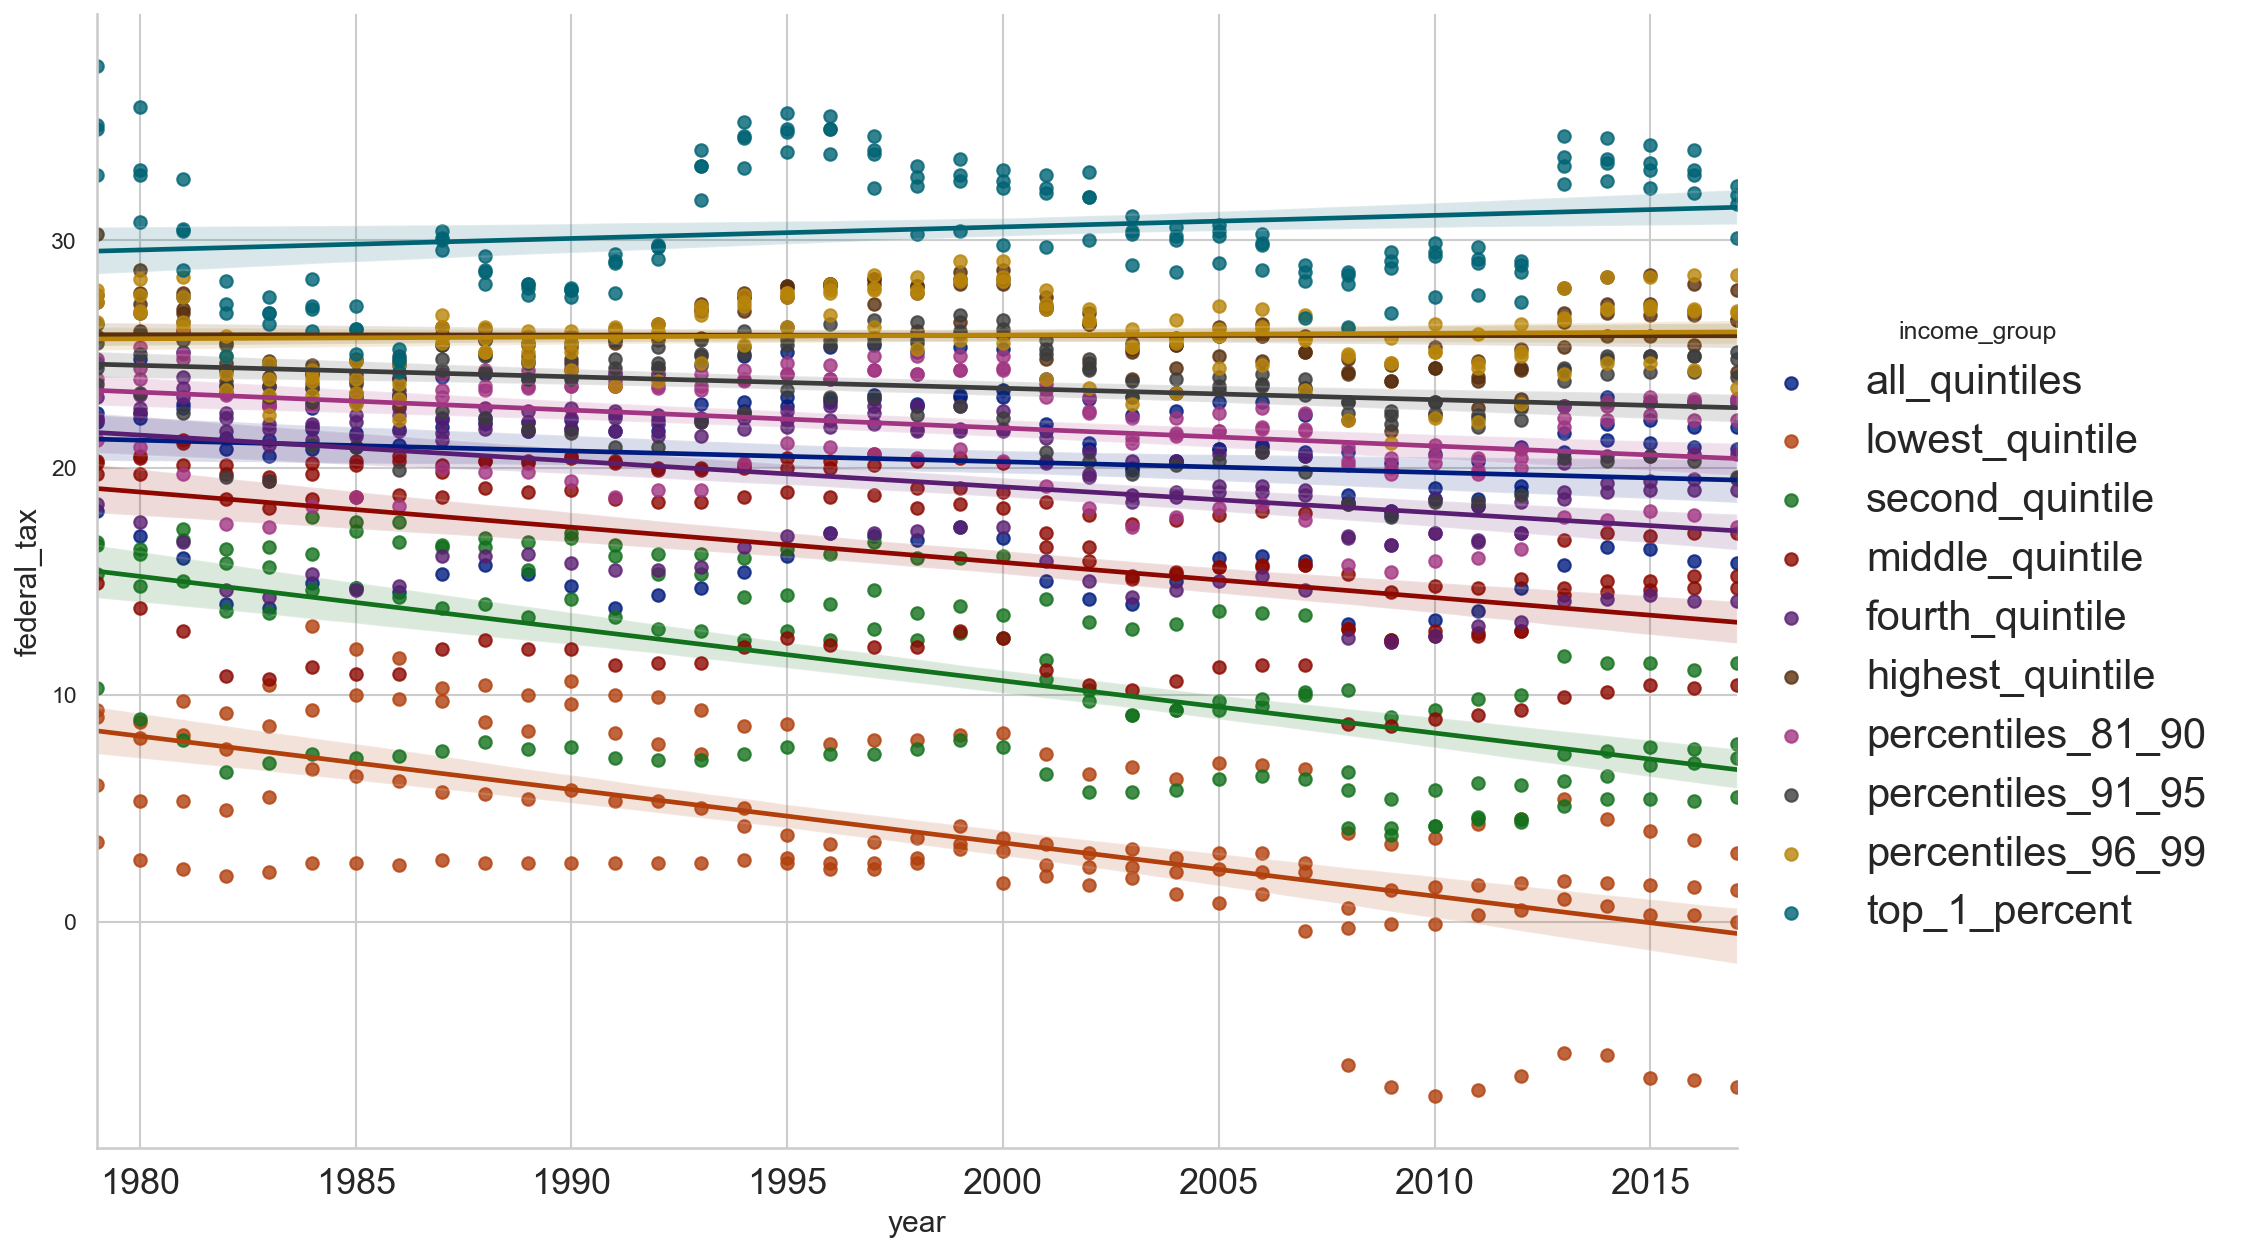

In [5]:
sns.lmplot(data=households_fed_tax_rates, x="year", y="federal_tax", hue="income_group", height=8.27, aspect=11.7/8.27)
#There is a general decline in federal tax rates

### 4. Look at Median Wages for Households? Why?
**Inflation is relatively low and so are the increases in median wages.**

> **Note:** Used CBO and US Treasury data median wages as US income distribution is skewed and so average wages data is not as useful.

In [6]:
median_household_incomes = pd.read_csv ('CBO_distribution_household_income_2017_data\households_ranked_by_market_inc_table_04_median_household_income_1979_2017.csv')
median_household_incomes.sort_values(by="year", inplace=True)
median_household_incomes.head()

        

year  market_inc  adj_market_inc  inc_before_transfers_taxes  \
0  1979       60900           33000                       63700   
1  1980       58100           31800                       61600   
2  1981       58000           31800                       61500   
3  1982       56300           31000                       60500   
4  1983       55500           30600                       59900   

   adj_inc_before_transfers_taxes  inc_after_transfers_taxes  \
0                           34900                      52300   
1                           33900                      50900   
2                           34100                      50400   
3                           33700                      50300   
4                           33500                      49900   

   adj_inc_after_transfers_taxes  
0                          28500  
1                          27700  
2                          27600  
3                          27700  
4                          27800

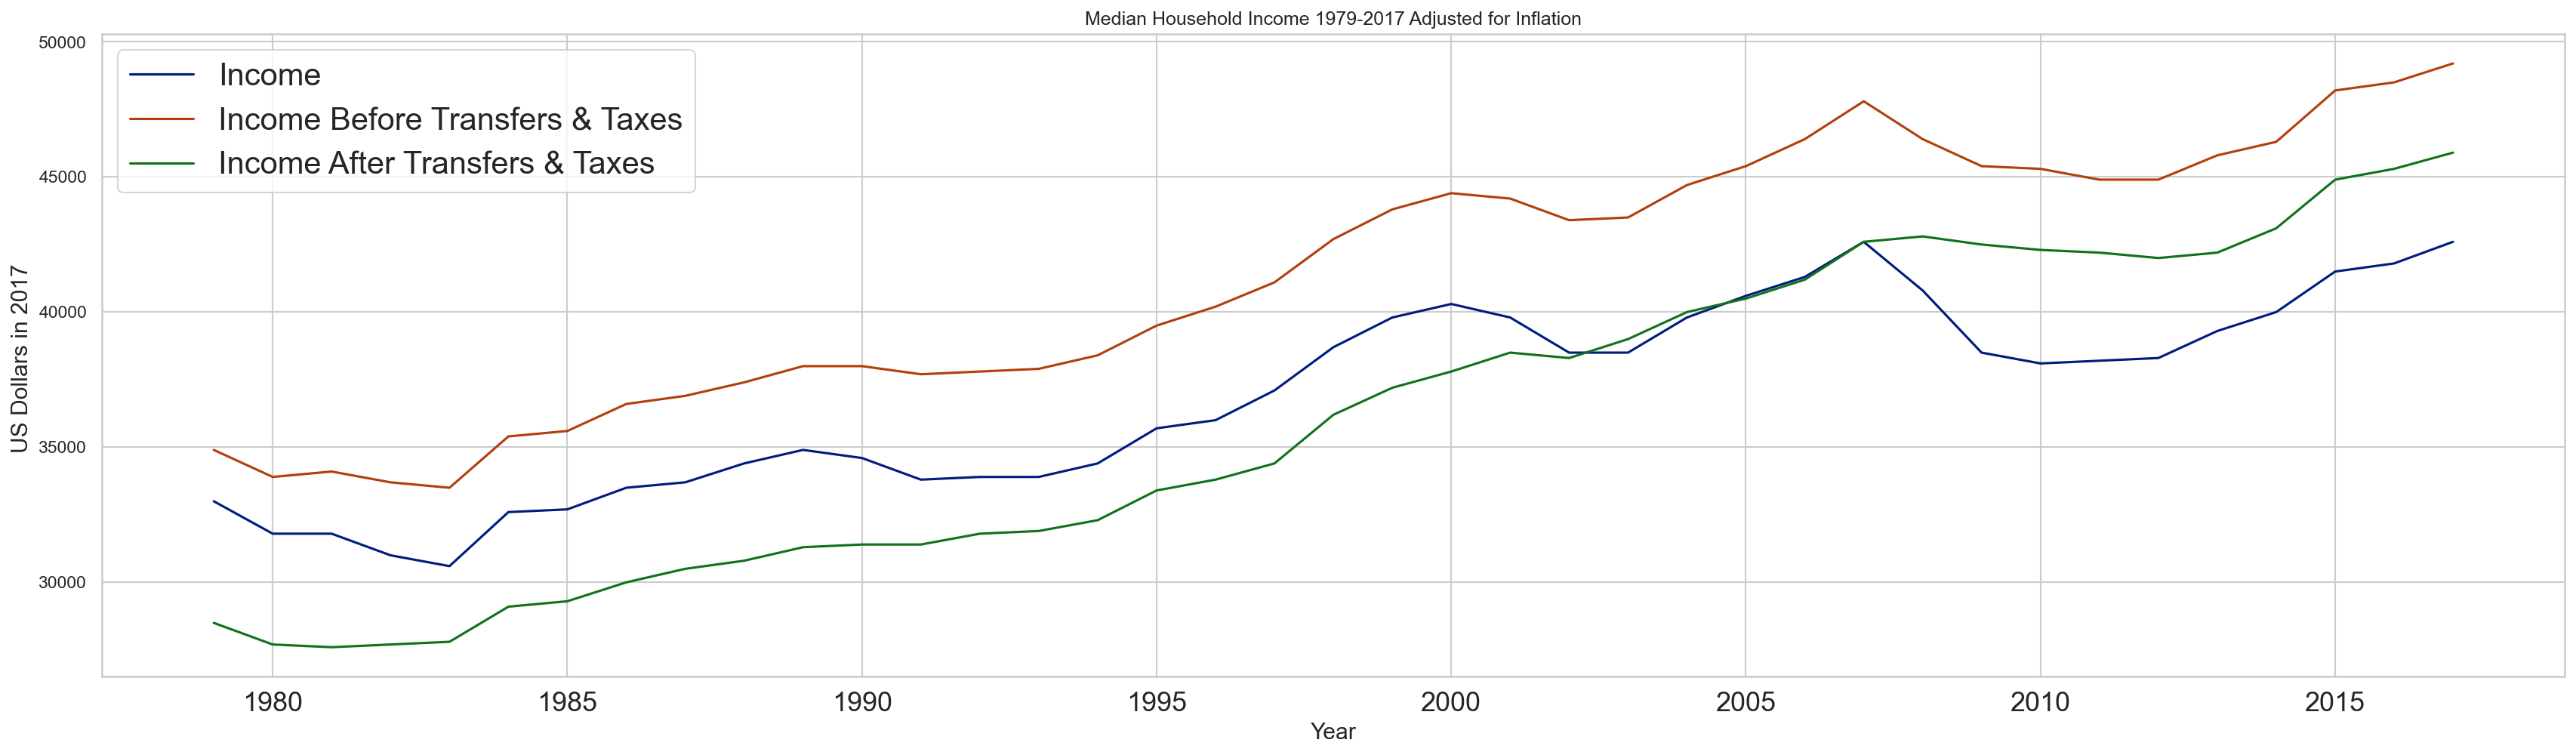

In [7]:
plt.plot(median_household_incomes["year"], median_household_incomes["adj_market_inc"], label="Income")
plt.plot(median_household_incomes["year"], median_household_incomes["adj_inc_before_transfers_taxes"], label="Income Before Transfers & Taxes")
plt.plot(median_household_incomes["year"], median_household_incomes["adj_inc_after_transfers_taxes"], label="Income After Transfers & Taxes")
plt.xlabel("Year")
plt.ylabel("US Dollars in 2017 ")
plt.title("Median Household Income 1979-2017 Adjusted for Inflation")
plt.legend()
plt.show()
#Income** consists of labor income; business income; capital income (including capital gains); income received 
#in retirement for past services; and other nongovernmental sources of income.  
#Income before transfers and taxes** consists of income plus social insurance benefits.
#Income after transfers and taxes**(disposable income) consists of income plus minus taxes plus private and government transfers

### 5. Income Inequality In The U.S. In Terms of Gini coefficient. 

Income inequality grew but transfers and taxes reduced increased inequality to some extent.

- **Based on CBO and Federal Reserve Bank data
- Gini coefficient is between 0-1 (0-max equality, 1-max inequality)

In [8]:
Income_Inequality_1979_2017 = pd.read_csv ('CBO_distribution_household_income_2017_data\Income_Inequality_1979_2017.csv')

Income_Inequality_1979_2017.head()


Year  Based_on_Market_Income  Based_on_Income_Before_Transfers_and_Taxes  \
0  1979                   0.472                                       0.412   
1  1980                   0.480                                       0.416   
2  1981                   0.484                                       0.419   
3  1982                   0.493                                       0.425   
4  1983                   0.505                                       0.437   

   Based_on_Income_After_Transfers_but_Before_Taxes  \
0                                             0.391   
1                                             0.393   
2                                             0.396   
3                                             0.402   
4                                             0.413   

   Based_on_Income_After_Transfers_and_Taxes  
0                                      0.352  
1                                      0.354  
2                                      0.361  
3                                      0.373  
4                                      0.387

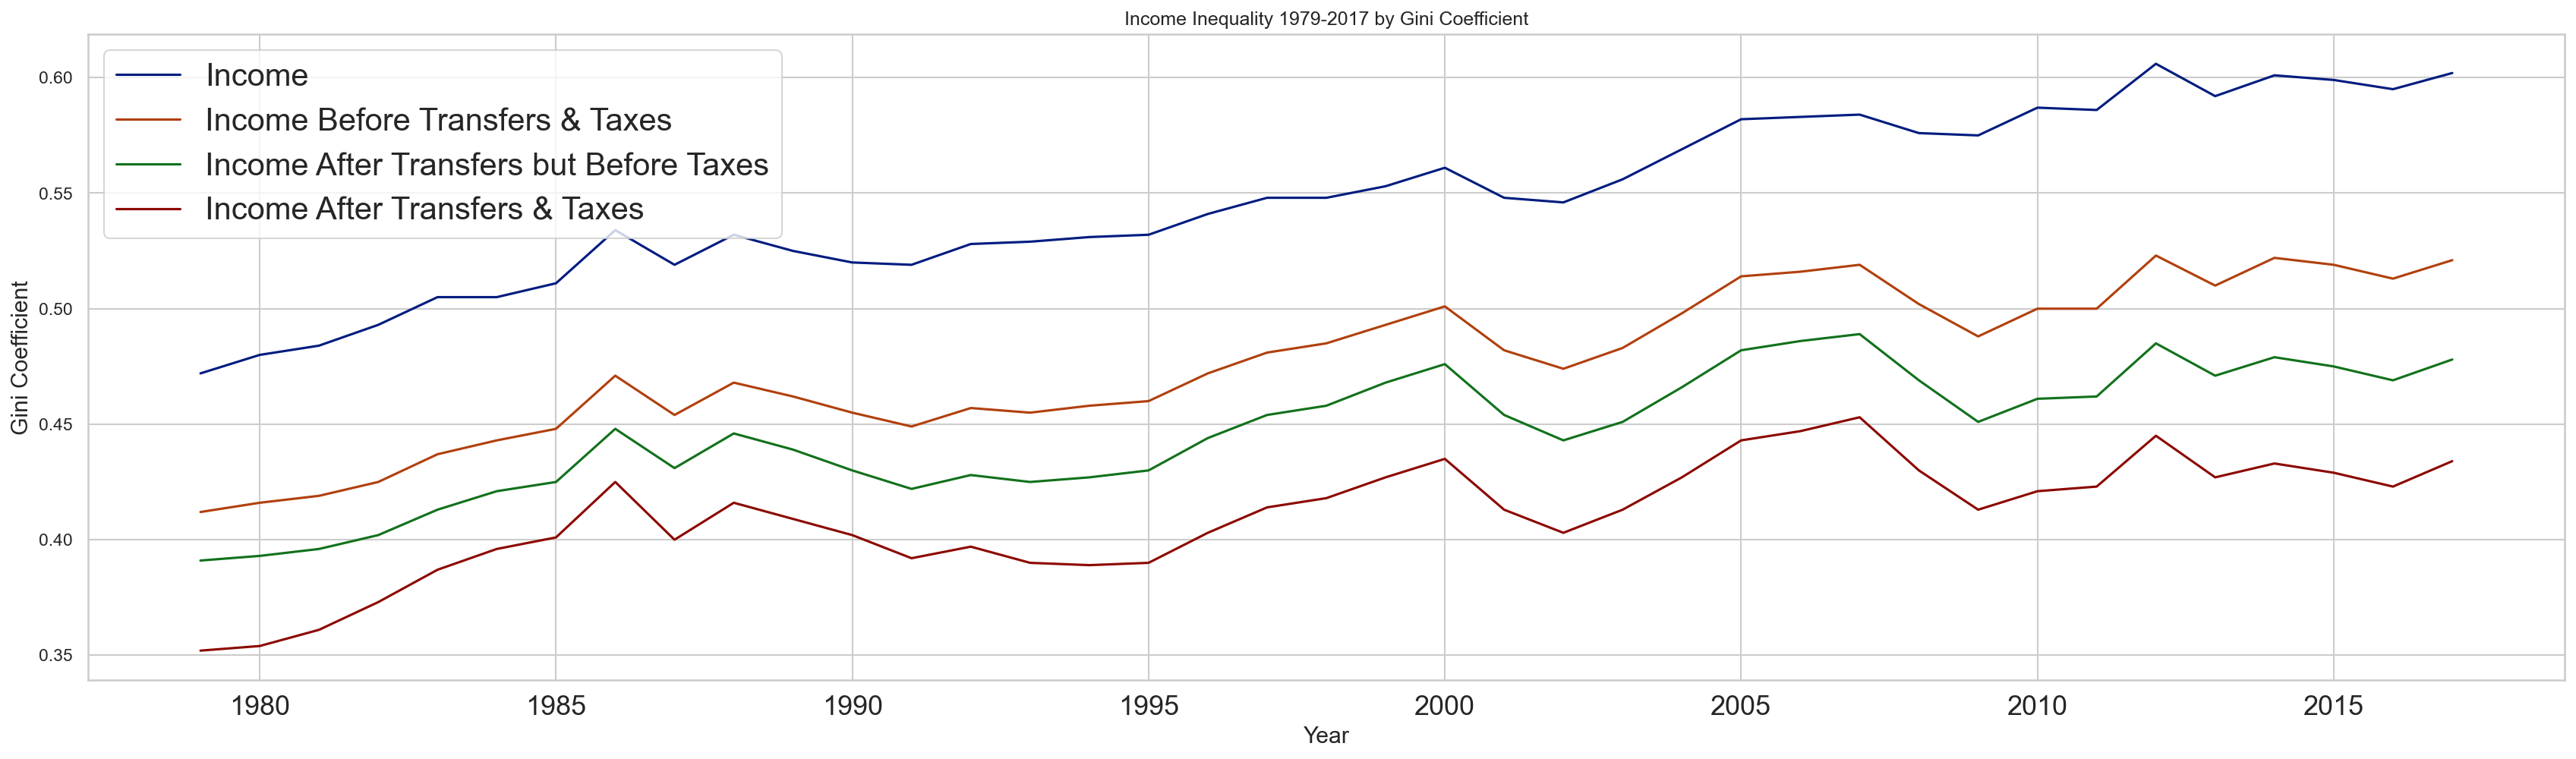

<Figure size 3000x3000 with 0 Axes>

<Figure size 3000x3000 with 0 Axes>

In [9]:
plt.plot(Income_Inequality_1979_2017["Year"], Income_Inequality_1979_2017["Based_on_Market_Income"], label="Income")
plt.plot(Income_Inequality_1979_2017["Year"], Income_Inequality_1979_2017["Based_on_Income_Before_Transfers_and_Taxes"], label="Income Before Transfers & Taxes")
plt.plot(Income_Inequality_1979_2017["Year"], Income_Inequality_1979_2017["Based_on_Income_After_Transfers_but_Before_Taxes"], label="Income After Transfers but Before Taxes")
plt.plot(Income_Inequality_1979_2017["Year"], Income_Inequality_1979_2017["Based_on_Income_After_Transfers_and_Taxes"], label="Income After Transfers & Taxes")
plt.xlabel("Year")
plt.ylabel("Gini Coefficient")
plt.title("Income Inequality 1979-2017 by Gini Coefficient")
plt.legend()
plt.show()
plt.figure(figsize=(20,20))

### 6. Wealth Inequality 

In [12]:
Federal_Reserve_Net_Wealth_Data = pd.read_csv ('CBO_distribution_household_income_2017_data\Federal_Reserve_Net_Wealth_Data.csv')
Federal_Reserve_Net_Wealth_Data.head()


year Income_Category  Before_Tax_Income   Net_Worth      Assets  \
0  1989    Less than 20          12.455448    3.818790   15.513835   
1  1989         20-39.9          29.062712   49.326039   82.422220   
2  1989         40-59.9          51.897699   83.774708  134.214561   
3  1989         60-79.9          80.960411  134.254340  214.806944   
4  1989         80-89.9         118.326754  266.778290  384.663545   

   Financial_Assets  Transaction_Accounts  Certificates_of_Deposit  \
0          1.988953              0.994477                25.856391   
1          8.751394              1.988953                19.889532   
2         16.707207              3.977906                21.878485   
3         30.112751              5.569069                19.889532   
4         58.873014              9.546975                17.900579   

   Savings_Bonds  Directly_Held_Bonds  ...  Other_Res_Real_Estate_Debt  \
0       0.397791            25.856391  ...                    7.955813   
1       1.392267            49.723830  ...                   47.734876   
2       1.193372            31.823251  ...                   27.845345   
3       0.994477            39.779064  ...                   27.845345   
4       0.994477            53.701736  ...                   53.701736   

   Installment_Loans  Other_Lines_of_Credit  Credit_Card_Balances  Other_Debt  \
0           2.685087               1.988953              0.596686    0.994477   
1           5.966860               1.790058              1.193372    1.988953   
2          11.933719               0.994477              1.591163    1.790058   
3          13.922672               3.977906              1.988953    1.988953   
4          15.911625               3.977906              2.565750    7.955813   

   Mortgages_Home_Equity_Loans  Home_Equity_Lines_of_Credit  \
0                    13.922672                     0.019890   
1                    23.867438                    49.723830   
2                    41.768017                    15.911625   
3                    71.602315                    29.834298   
4                    81.547080                    49.723830   

   Vehicle_Installment_Loans  Education_Installment_Loans  \
0                   3.977906                     5.330395   
1                   5.966860                     5.966860   
2                  11.933719                     7.955813   
3                  12.411068                     5.966860   
4                  15.911625                     3.977906   

   Other_Installment_Loans  
0                 0.994477  
1                 1.988953  
2                 2.983430  
3                 3.977906  
4                 3.977906  

[5 rows x 37 columns]

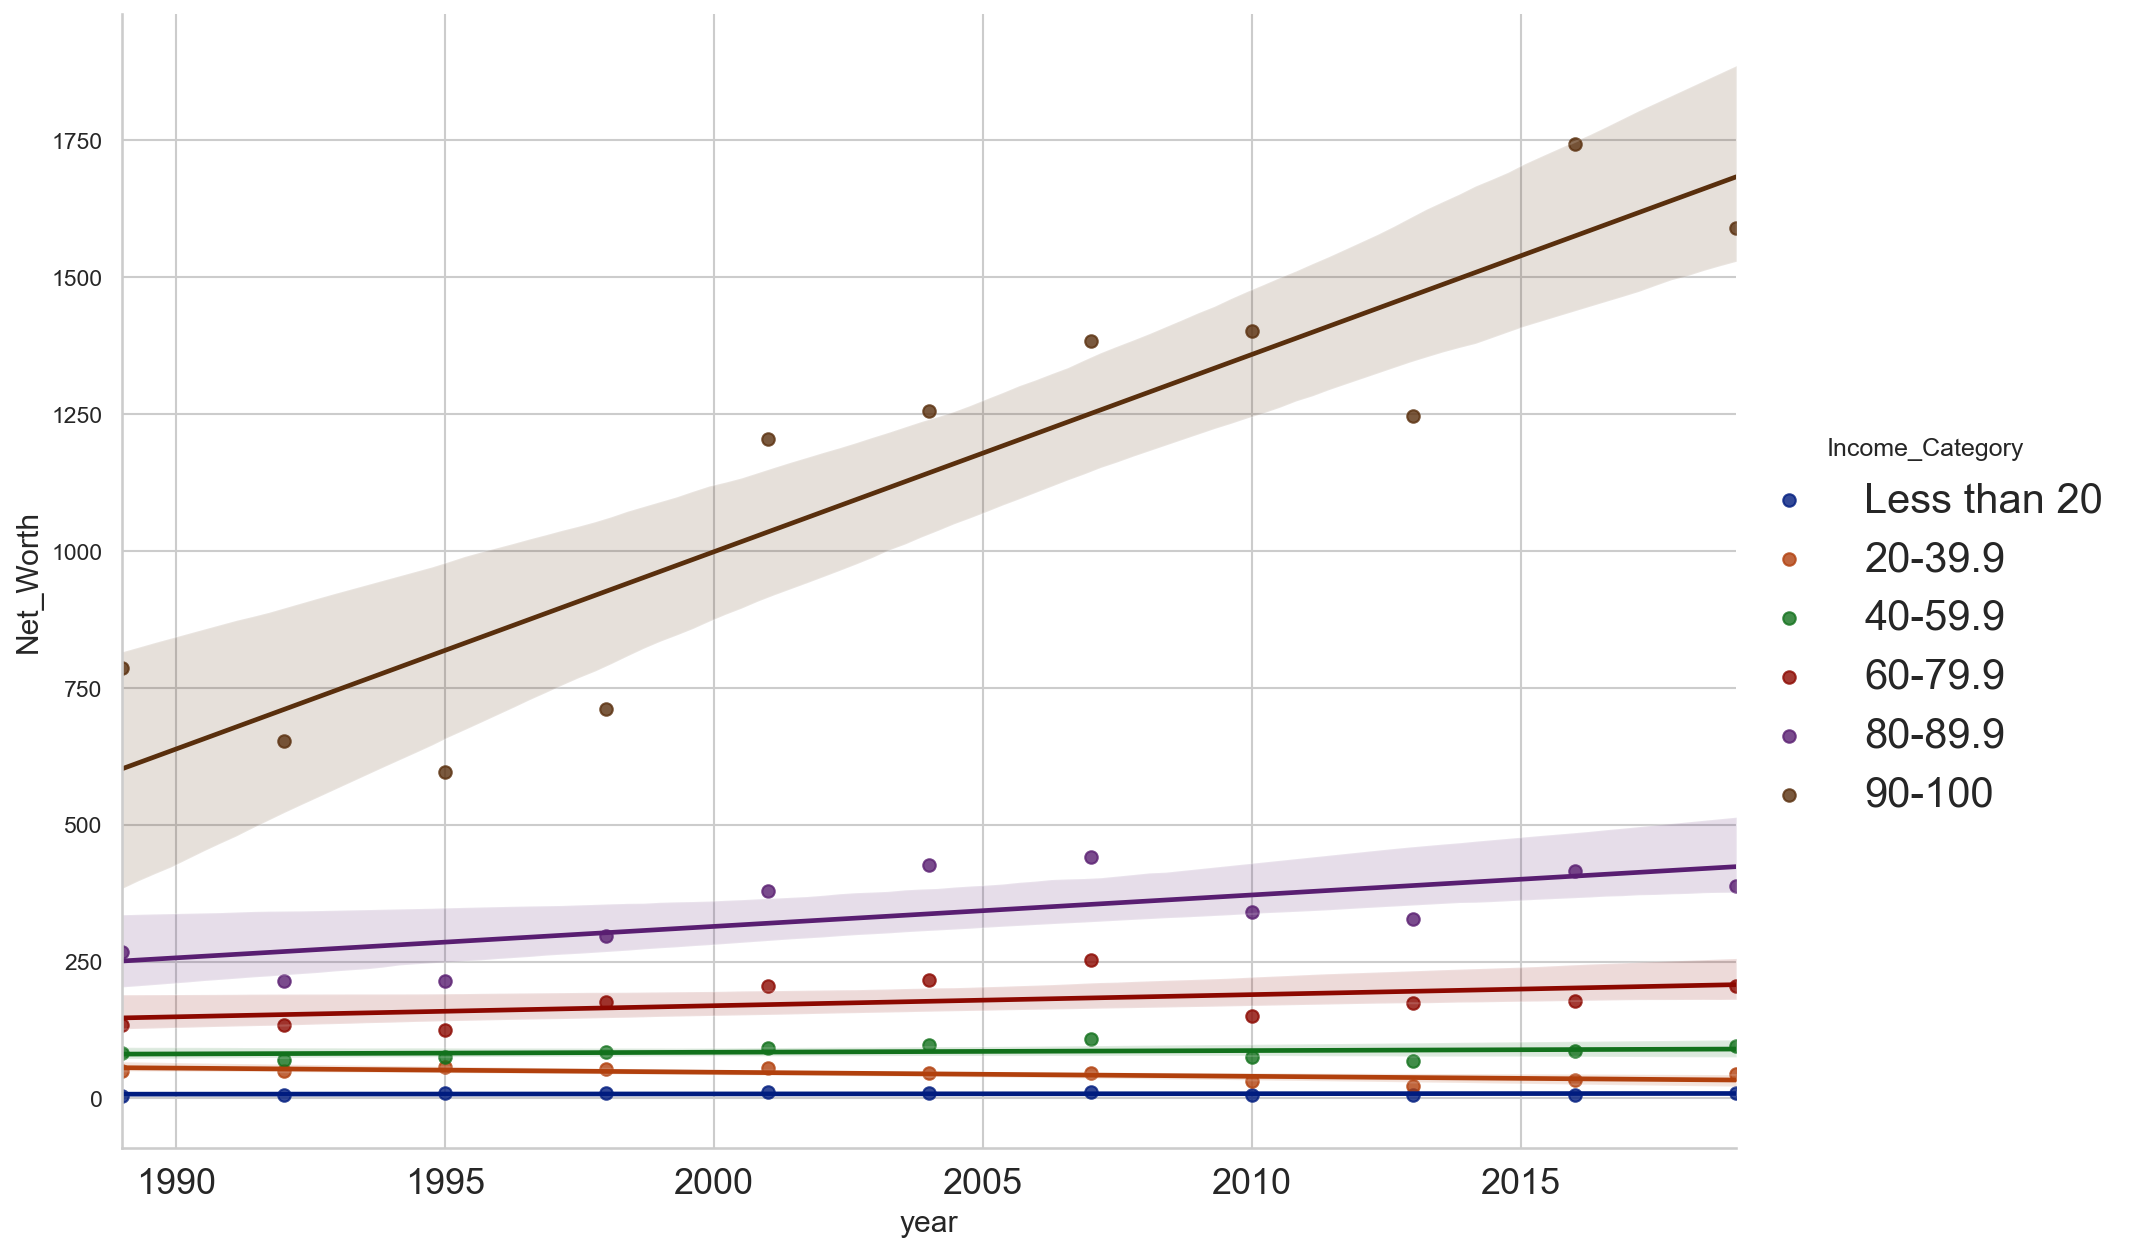

In [13]:
sns.lmplot(data=Federal_Reserve_Net_Wealth_Data, x="year", y="Net_Worth", hue="Income_Category", height=8.27, aspect=11.7/8.27)
#There is a large net worth increase in top 10%

### 7. Life Expectancy Outcomes. 

**There is a marked difference. 15 years for males and 10 years for females.**

In [16]:
National_Life_Expectancy_By_Sex_By_Income = pd.read_csv ('National_Life_Expectancy.csv')
National_Life_Expectancy_By_Sex_By_Income.head()


Gender  Household_Income_Percentile  Year    Count Mean_Household_Income  \
0      F                            1  2001  398,740                499.11   
1      F                            1  2002  411,159                541.31   
2      F                            1  2003  420,298                529.14   
3      F                            1  2004  427,728                 499.3   
4      F                            1  2005  433,665                474.15   

   Race_Adjusted_Life_Expectancy  Unadjusted_Life_Expectancy  \
0                          79.89                       79.68   
1                          79.41                       79.18   
2                          79.57                       79.36   
3                          80.09                       79.90   
4                          80.47                       80.28   

   Standard_Error_of_Race-Adjusted_Life_Expectancy   \
0                                              0.39   
1                                              0.35   
2                                              0.36   
3                                              0.35   
4                                              0.33   

   Standard_Error_of_Unadjusted_Life_Expectancy  
0                                          0.39  
1                                          0.35  
2                                          0.36  
3                                          0.35  
4                                          0.33

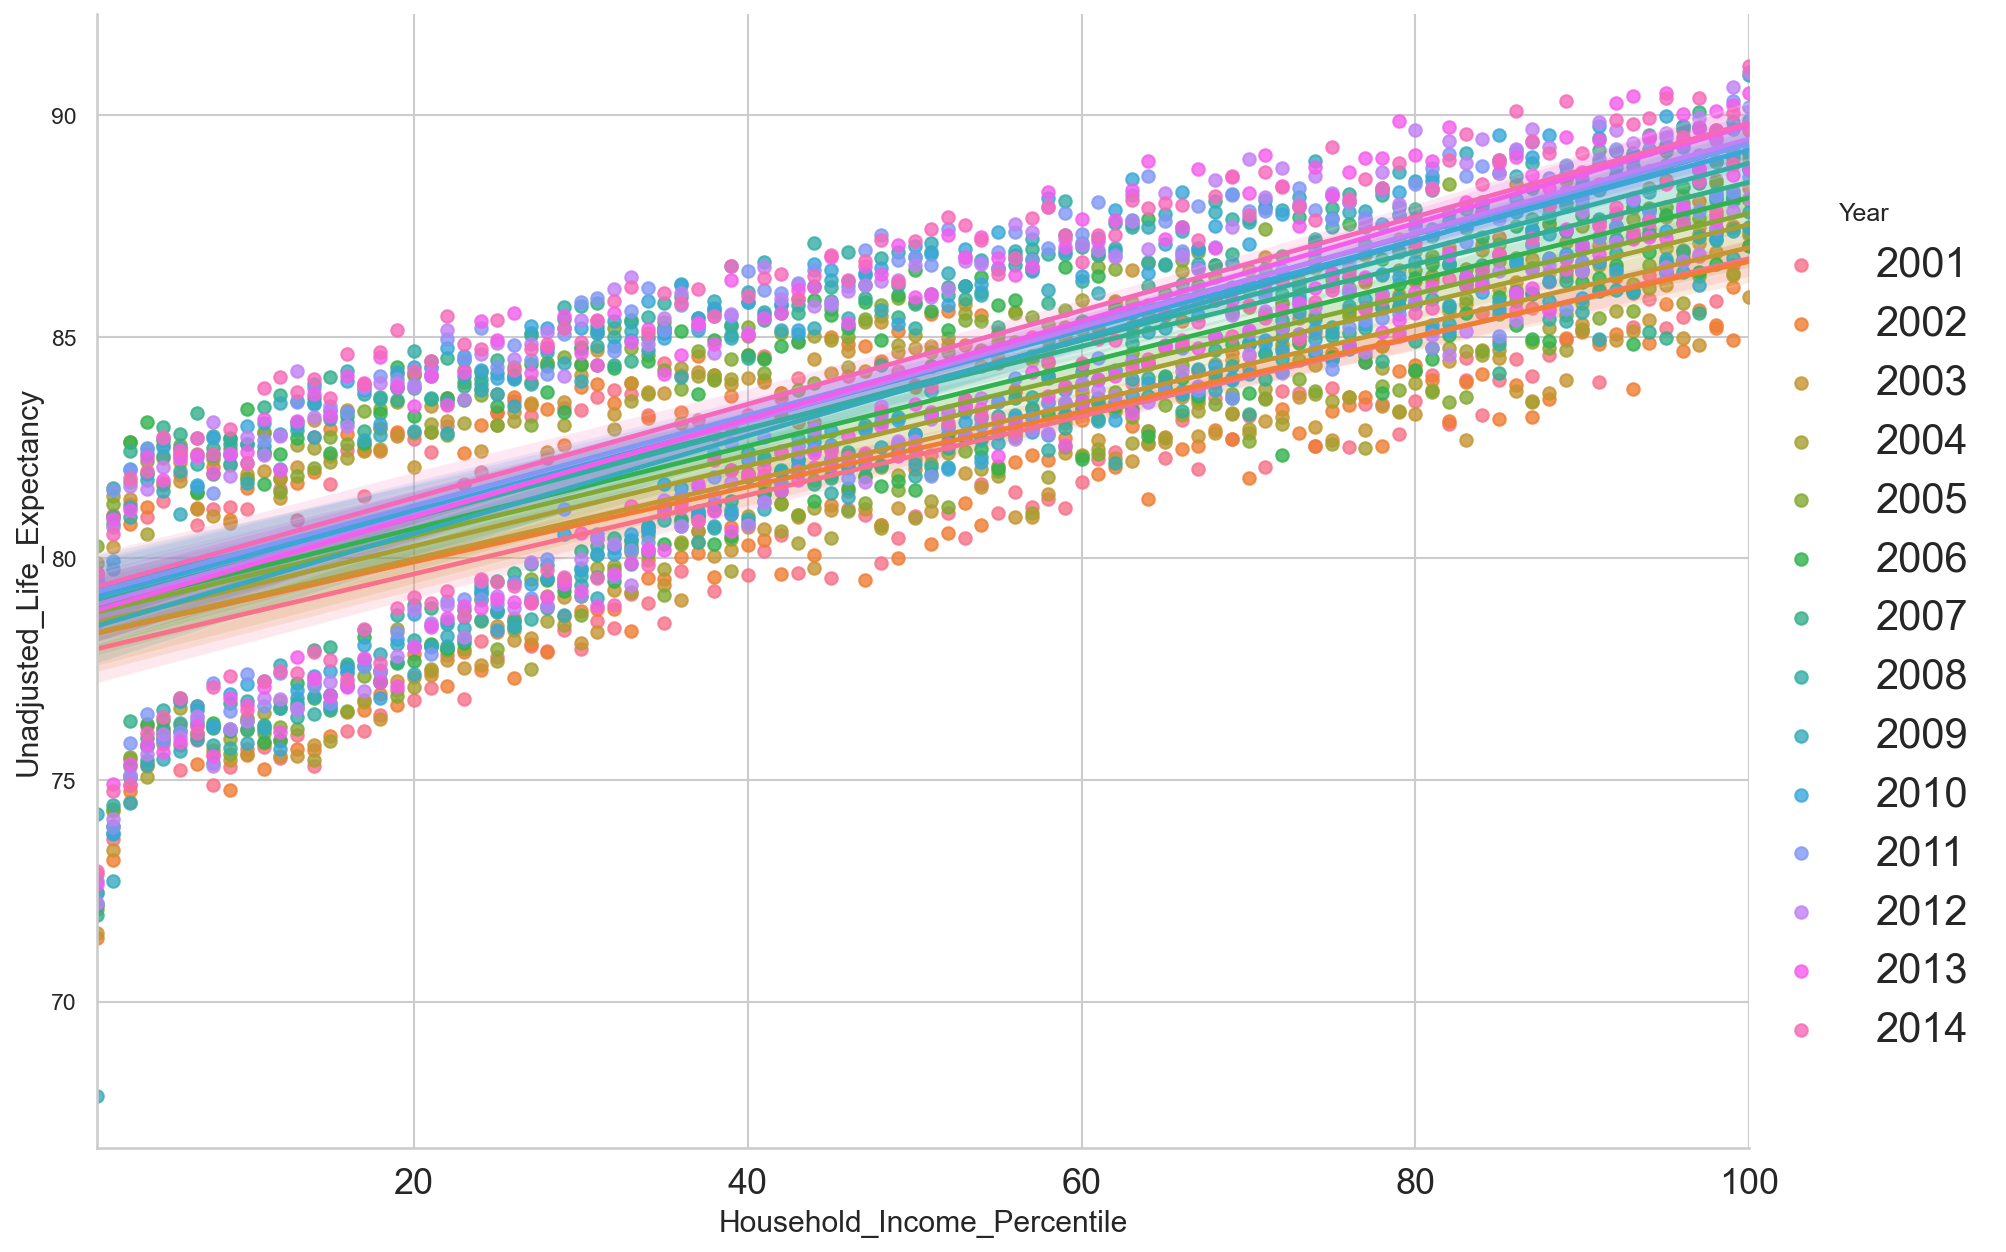

In [19]:
sns.lmplot(data=National_Life_Expectancy_By_Sex_By_Income, x="Household_Income_Percentile", y="Unadjusted_Life_Expectancy", hue="Year", height=8.27, aspect=11.7/8.27)
#

###  9. Possible life expectancy model for prediction and inference base on the Harvard Opportunity Project data

**EDA and data cleaning.**

In [20]:
#Load Harvard Opportunity Project data
df = pd.read_csv ('Merged_Census_data.csv')
df.head()

state              county    tract       cz      czname  hhinc_mean2000  \
0  Alabama  Autauga County, AL  20100.0  11101.0  Montgomery       68638.727   
1  Alabama  Autauga County, AL  20200.0  11101.0  Montgomery       57242.512   
2  Alabama  Autauga County, AL  20300.0  11101.0  Montgomery       75647.727   
3  Alabama  Autauga County, AL  20400.0  11101.0  Montgomery       74852.055   
4  Alabama  Autauga County, AL  20500.0  11101.0  Montgomery       96174.766   

   mean_commutetime2000  frac_coll_plus2000  frac_coll_plus2010  \
0             26.171911            0.156479            0.254428   
1             24.806705            0.146932            0.267194   
2             25.322525            0.224413            0.164159   
3             22.965347            0.230469            0.252744   
4             26.222353            0.321154            0.375063   

   foreign_share2010  ...  mail_return_rate2010  ln_wage_growth_hs_grad  \
0           0.009950  ...             83.500000                0.038233   
1           0.016337  ...             81.300003                0.089306   
2           0.027096  ...             79.500000               -0.177743   
3           0.015083  ...             83.500000               -0.072311   
4           0.046488  ...             77.300003               -0.096140   

   jobs_total_5mi_2015  jobs_highpay_5mi_2015  popdensity2010  \
0              10109.0                 3396.0       504.75183   
1               9948.0                 3328.0      1682.17050   
2              10387.0                 3230.0      1633.41390   
3              12933.0                 3635.0      1780.03250   
4              12933.0                 3635.0      2446.26220   

   ann_avg_job_growth_2004_2013  job_density_2013  Life_Expectancy  \
0                     -0.006769         92.133049             73.1   
1                     -0.004253        971.317870             76.9   
2                      0.014218        340.920070              NaN   
3                     -0.019841        207.386370             75.4   
4                      0.018627        800.272640             79.4   

   Life_Expectancy_Range            MTW Status  
0              56.9-75.1  Matching and updated  
1              75.2-77.5  Matching and updated  
2                    NaN  Matching and updated  
3              75.2-77.5  Matching and updated  
4              77.6-79.5  Matching and updated  

[5 rows x 41 columns]

In [21]:
#Overview of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74103 entries, 0 to 74102
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   state                         74103 non-null  object 
 1   county                        74103 non-null  object 
 2   tract                         74102 non-null  float64
 3   cz                            73094 non-null  float64
 4   czname                        73094 non-null  object 
 5   hhinc_mean2000                72393 non-null  float64
 6   mean_commutetime2000          72417 non-null  float64
 7   frac_coll_plus2000            72464 non-null  float64
 8   frac_coll_plus2010            73248 non-null  float64
 9   foreign_share2010             72378 non-null  float64
 10  med_hhinc1990                 72420 non-null  float64
 11  med_hhinc2016                 72954 non-null  float64
 12  popdensity2000                72739 non-null  float64
 13  p

In [22]:
#Clean data. Remove null values
df.dropna(inplace=True)
df.head()

state              county    tract       cz      czname  hhinc_mean2000  \
1  Alabama  Autauga County, AL  20200.0  11101.0  Montgomery       57242.512   
3  Alabama  Autauga County, AL  20400.0  11101.0  Montgomery       74852.055   
4  Alabama  Autauga County, AL  20500.0  11101.0  Montgomery       96174.766   
5  Alabama  Autauga County, AL  20600.0  11101.0  Montgomery       68095.766   
9  Alabama  Autauga County, AL  20900.0  11101.0  Montgomery       66234.398   

   mean_commutetime2000  frac_coll_plus2000  frac_coll_plus2010  \
1             24.806705            0.146932            0.267194   
3             22.965347            0.230469            0.252744   
4             26.222353            0.321154            0.375063   
5             21.630421            0.160706            0.239424   
9             36.436531            0.089286            0.127820   

   foreign_share2010  ...  mail_return_rate2010  ln_wage_growth_hs_grad  \
1           0.016337  ...             81.300003                0.089306   
3           0.015083  ...             83.500000               -0.072311   
4           0.046488  ...             77.300003               -0.096140   
5           0.024985  ...             82.800003               -0.048562   
9           0.009670  ...             83.000000                0.035837   

   jobs_total_5mi_2015  jobs_highpay_5mi_2015  popdensity2010  \
1               9948.0                 3328.0     1682.170500   
3              12933.0                 3635.0     1780.032500   
4              12933.0                 3635.0     2446.262200   
5               9193.0                 3052.0     1184.372100   
9                279.0                  106.0       50.206135   

   ann_avg_job_growth_2004_2013  job_density_2013  Life_Expectancy  \
1                     -0.004253         971.31787             76.9   
3                     -0.019841         207.38637             75.4   
4                      0.018627         800.27264             79.4   
5                     -0.051588         336.77753             73.1   
9                      0.001544           2.56560             73.9   

   Life_Expectancy_Range            MTW Status  
1              75.2-77.5  Matching and updated  
3              75.2-77.5  Matching and updated  
4              77.6-79.5  Matching and updated  
5              56.9-75.1  Matching and updated  
9              56.9-75.1  Matching and updated  

[5 rows x 41 columns]

In [23]:
#Cut out extraneous data columns
abridged_df=df[['state', 'county', 'tract', 'czname', 
       'mean_commutetime2000', 'frac_coll_plus2010',
       'foreign_share2010', 'med_hhinc2016', 'poor_share2010', 'share_white2010',
       'share_black2010', 'share_hisp2010', 'share_asian2010','gsmn_math_g3_2013', 'rent_twobed2015',
       'singleparent_share2010', 'traveltime15_2010', 'mail_return_rate2010', 'ln_wage_growth_hs_grad', 'jobs_total_5mi_2015',
       'jobs_highpay_5mi_2015', 'popdensity2010',
       'ann_avg_job_growth_2004_2013', 'job_density_2013', 'Life_Expectancy']].copy()
abridged_df.head()

state              county    tract      czname  mean_commutetime2000  \
1  Alabama  Autauga County, AL  20200.0  Montgomery             24.806705   
3  Alabama  Autauga County, AL  20400.0  Montgomery             22.965347   
4  Alabama  Autauga County, AL  20500.0  Montgomery             26.222353   
5  Alabama  Autauga County, AL  20600.0  Montgomery             21.630421   
9  Alabama  Autauga County, AL  20900.0  Montgomery             36.436531   

   frac_coll_plus2010  foreign_share2010  med_hhinc2016  poor_share2010  \
1            0.267194           0.016337        41107.0        0.147590   
3            0.252744           0.015083        52704.0        0.063223   
4            0.375063           0.046488        52463.0        0.059569   
5            0.239424           0.024985        63750.0        0.105232   
9            0.127820           0.009670        44591.0        0.099070   

   share_white2010  ...  singleparent_share2010  traveltime15_2010  \
1         0.388940  ...                0.488462           0.152040   
3         0.918833  ...                0.227533           0.350673   
4         0.783764  ...                0.259698           0.250496   
5         0.728462  ...                0.316372           0.341646   
9         0.843348  ...                0.264840           0.061808   

   mail_return_rate2010  ln_wage_growth_hs_grad  jobs_total_5mi_2015  \
1             81.300003                0.089306               9948.0   
3             83.500000               -0.072311              12933.0   
4             77.300003               -0.096140              12933.0   
5             82.800003               -0.048562               9193.0   
9             83.000000                0.035837                279.0   

   jobs_highpay_5mi_2015  popdensity2010  ann_avg_job_growth_2004_2013  \
1                 3328.0     1682.170500                     -0.004253   
3                 3635.0     1780.032500                     -0.019841   
4                 3635.0     2446.262200                      0.018627   
5                 3052.0     1184.372100                     -0.051588   
9                  106.0       50.206135                      0.001544   

   job_density_2013  Life_Expectancy  
1         971.31787             76.9  
3         207.38637             75.4  
4         800.27264             79.4  
5         336.77753             73.1  
9           2.56560             73.9  

[5 rows x 25 columns]

#  10. Statistical Graphs Based on the Harvard Opportunity Project Data

**Heat and **

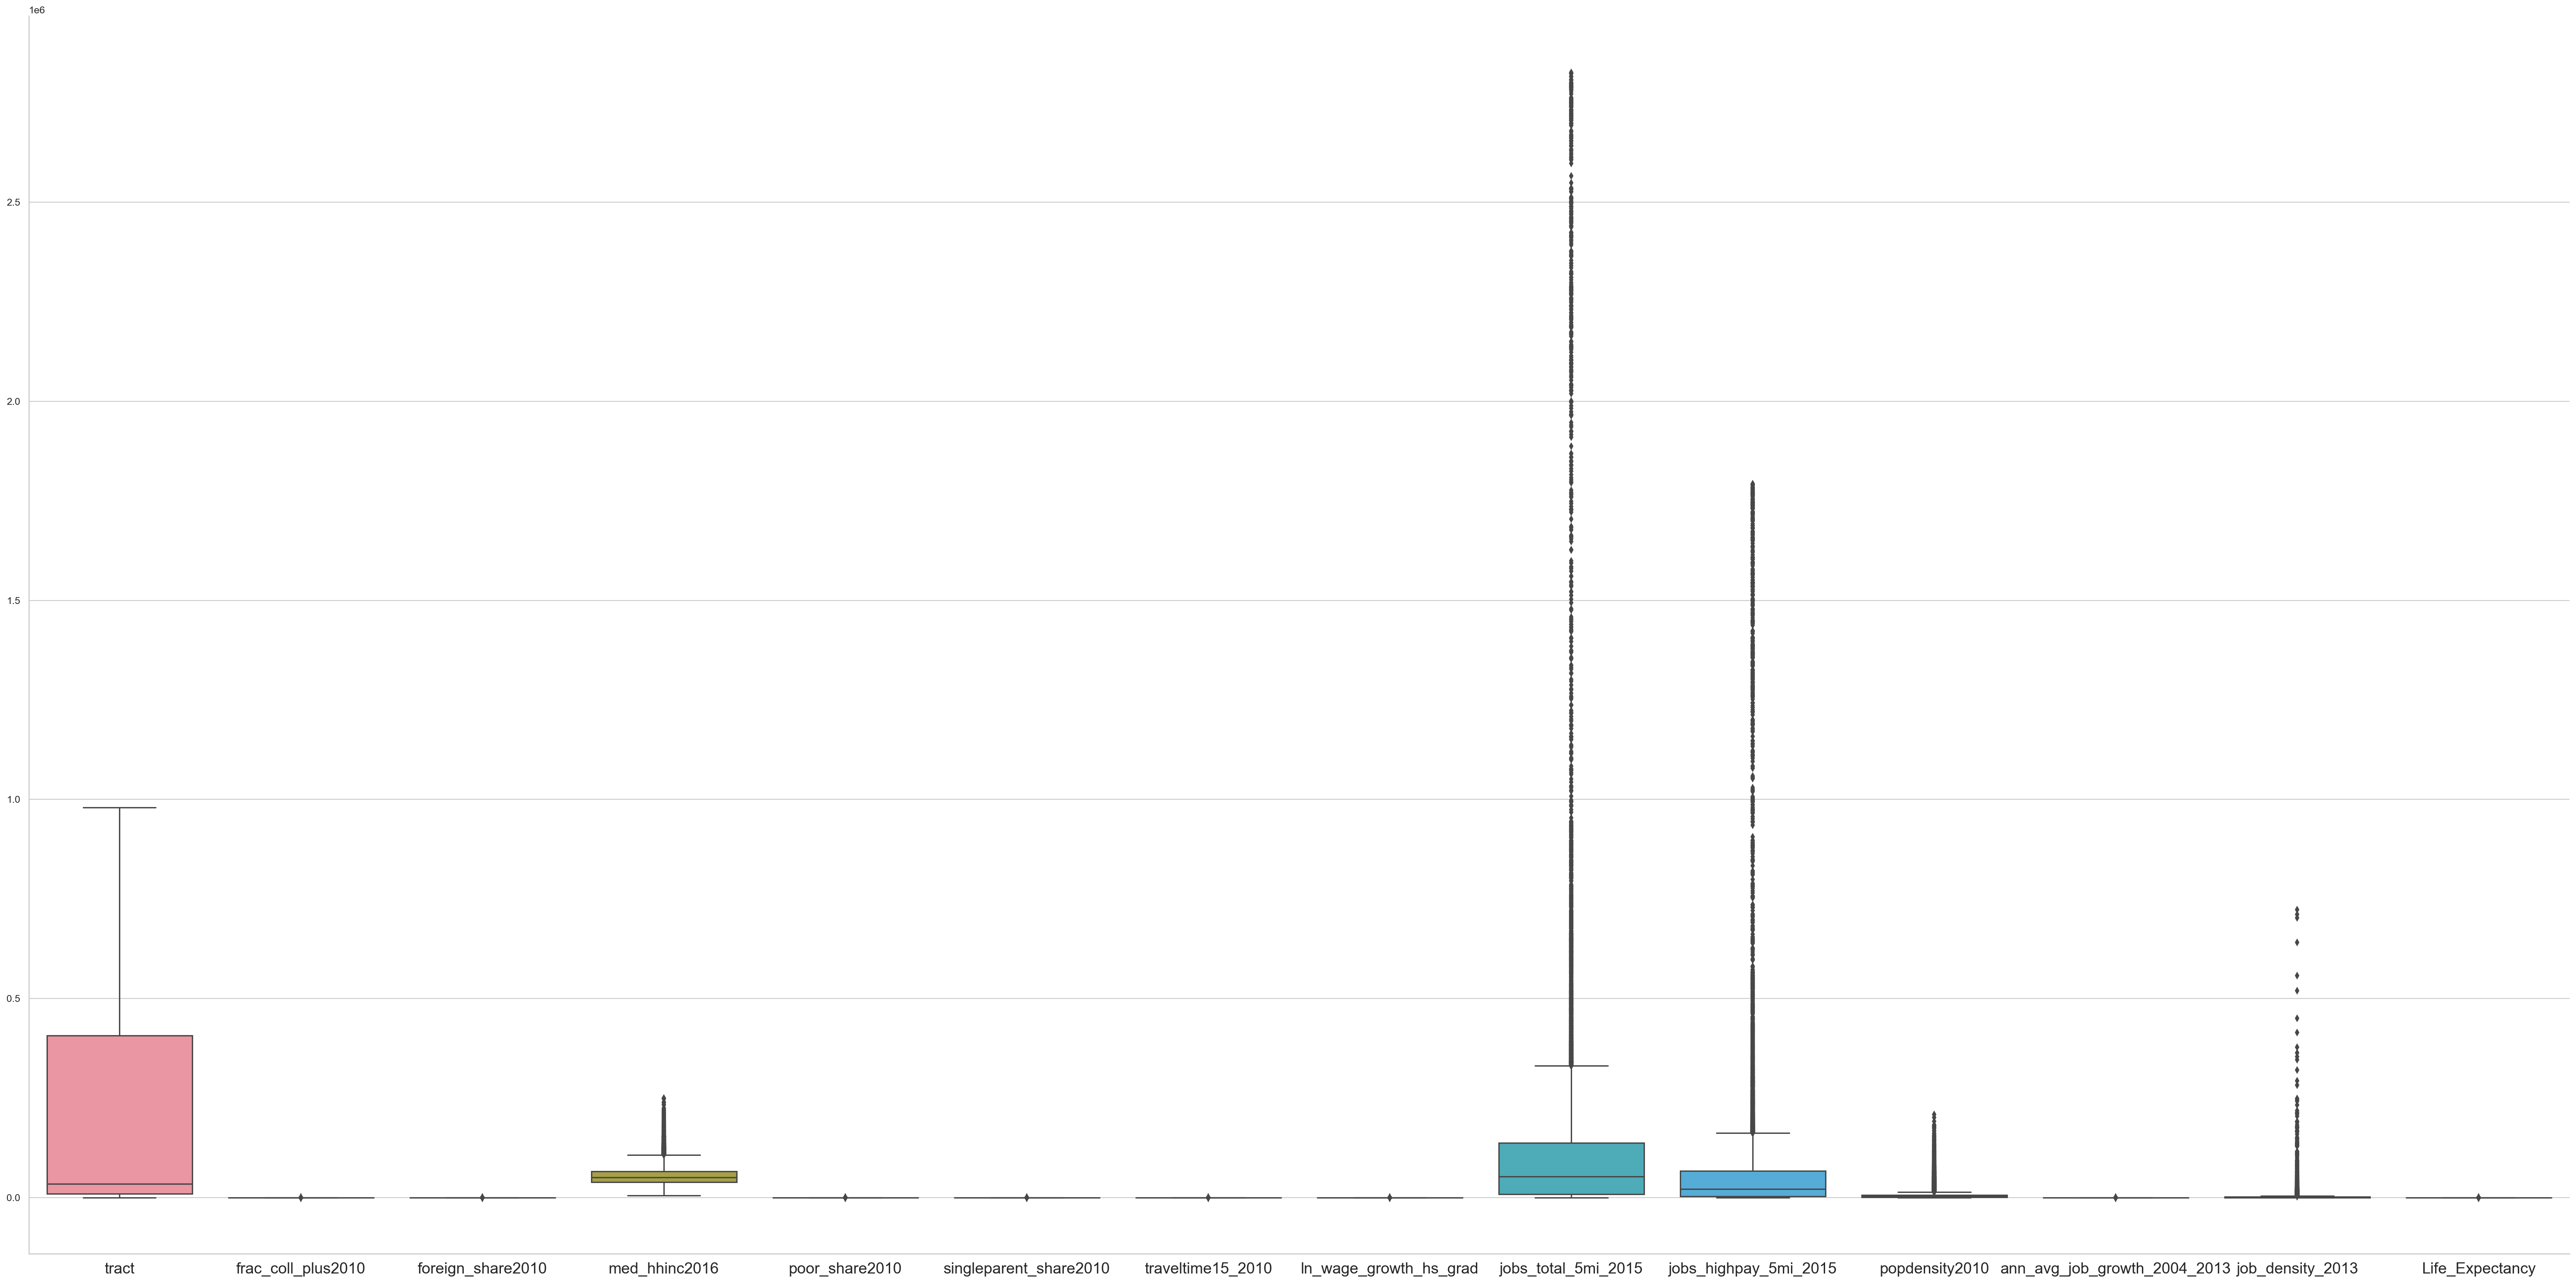

In [32]:
sns.factorplot(data=abridged_df[['tract', 'czname', 'frac_coll_plus2010',
       'foreign_share2010', 'med_hhinc2016', 'poor_share2010',
       'singleparent_share2010','traveltime15_2010', 'ln_wage_growth_hs_grad', 'jobs_total_5mi_2015',
       'jobs_highpay_5mi_2015', 'popdensity2010',
       'ann_avg_job_growth_2004_2013', 'job_density_2013', 'Life_Expectancy']], kind='box' , size=20, aspect=2.0)

<AxesSubplot:>

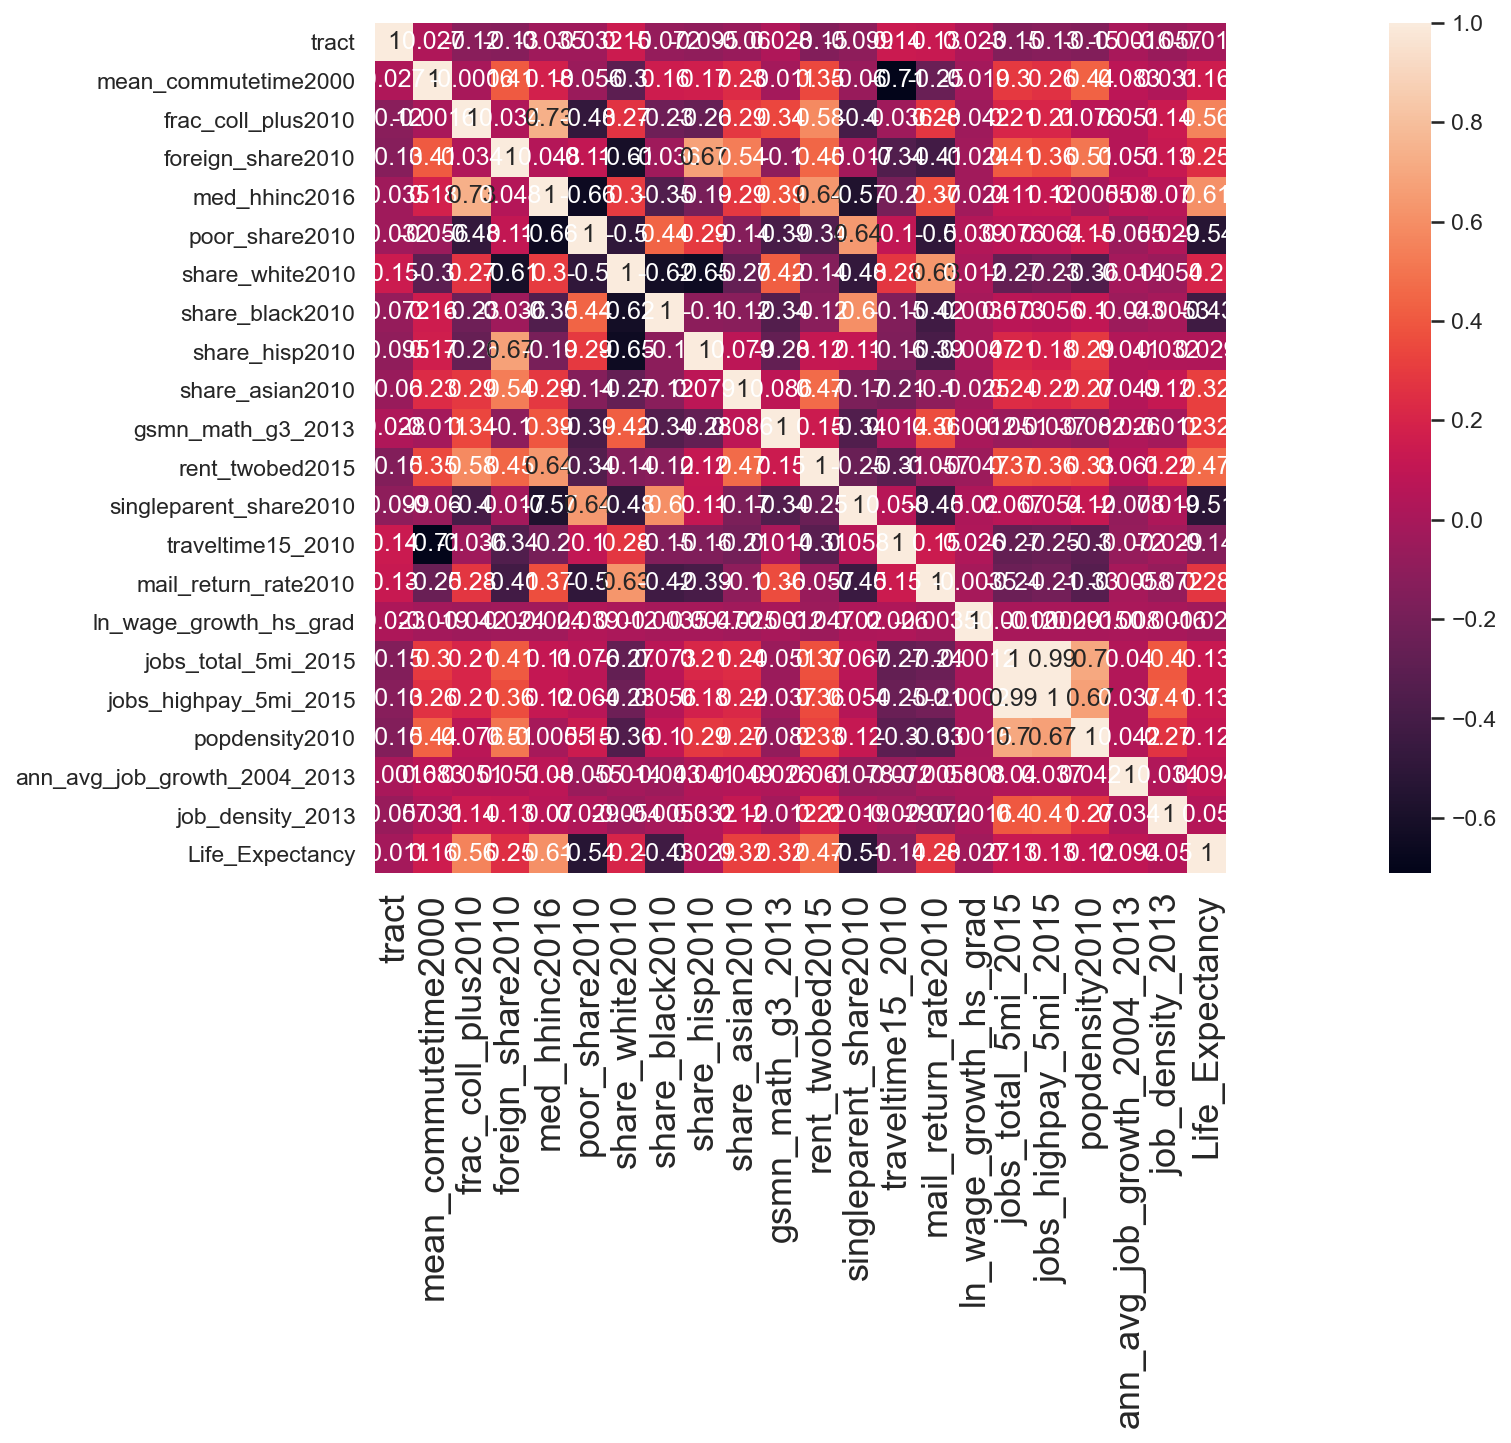

In [205]:
#Correlation Map
corr = abridged_df.corr()
sns.heatmap(data=corr, square=True , annot=True, cbar=True)

# Decision Tree Modeling of the Harvard Opportunity Project Data

In [35]:
#Decision trees and ensemble methods do not generally require feature scaling to be performed as 
#they are not sensitive to the the variance in the data.
#Encode variables
from sklearn.preprocessing import LabelEncoder
label_state = LabelEncoder()
label_county = LabelEncoder()
label_tract = LabelEncoder()
label_czname = LabelEncoder()
abridged_df['state'] = label_state.fit_transform(abridged_df['state'])
abridged_df['county'] = label_county.fit_transform(abridged_df['county'])
abridged_df['tract'] = label_county.fit_transform(abridged_df['tract'])
abridged_df['czname'] = label_czname.fit_transform(abridged_df['czname'])

#Set up variables for testing
# Define X and y.
feature_cols = ['tract', 'czname', 'county', 'state','frac_coll_plus2010',
       'foreign_share2010', 'med_hhinc2016', 'poor_share2010',
       'singleparent_share2010','traveltime15_2010', 'ln_wage_growth_hs_grad', 'jobs_total_5mi_2015',
       'jobs_highpay_5mi_2015', 'popdensity2010',
       'ann_avg_job_growth_2004_2013', 'job_density_2013']
X = abridged_df[feature_cols]
y = abridged_df.Life_Expectancy

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)


DecisionTreeRegressor()

In [37]:
y_pred = regressor.predict(X_test)

In [38]:
abridged_df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
abridged_df

Actual  Predicted
69538    77.5       79.0
45555    79.4       83.7
16913    76.2       77.6
51774    74.0       77.9
50435    81.6       82.6
...       ...        ...
42810    81.6       79.1
27024    79.6       81.4
57137    85.0       77.4
53717    77.3       71.9
24998    72.9       72.7

[10892 rows x 2 columns]

In [39]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 2.8909933896437754
Mean Squared Error: 14.0258676092545
Root Mean Squared Error: 3.745112496208158


In [40]:
# Calculate the absolute errors
errors = abs(y_pred - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 2.89 degrees.
Accuracy: 96.28 %.


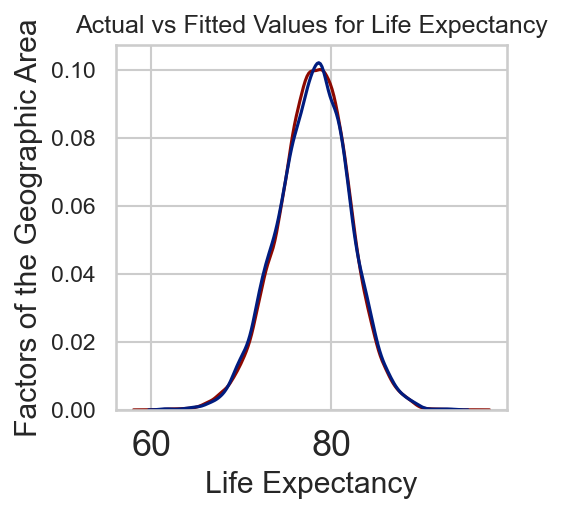

In [41]:
import seaborn as sns
plt.figure(figsize=(3, 3))
ax = sns.distplot(y, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax)
plt.title('Actual vs Fitted Values for Life Expectancy')
plt.xlabel('Life Expectancy')
plt.ylabel('Factors of the Geographic Area')
plt.show()
plt.close()

In [42]:
# Instantiate a DecisionTreeRegressor (with random_state=1).
from sklearn.tree import DecisionTreeRegressor

treereg = DecisionTreeRegressor(random_state=1)
treereg



DecisionTreeRegressor(random_state=1)

In [43]:
# Use leave-one-out cross-validation (LOOCV) to estimate the RMSE for this model.
from sklearn.model_selection import cross_val_score
scores = cross_val_score(treereg, X, y, cv=14, scoring='neg_mean_squared_error')
np.mean(np.sqrt(-scores))

3.853843553769361

In [44]:
#Best 
treereg2 = DecisionTreeRegressor(random_state=1)
treereg.fit(X,y)

DecisionTreeRegressor(random_state=1)

In [46]:
#Find optimal max depth
from sklearn.model_selection import GridSearchCV
n=range(1,10)
params={'max_depth': n}
gs = GridSearchCV(DecisionTreeRegressor(),
                  param_grid=params,
                  cv=5) 
gs.fit(X, y)
gs.best_params_
#Max depth is best at 7

{'max_depth': 7}

In [47]:
# Or try another way for determining max depth
# List of values to try for max_depth:
max_depth_range = range(1, 21)

# List to store the average RMSE for each value of max_depth:
RMSE_scores = []

# Use 10-fold cross-validation with each value of max_depth.
from sklearn.model_selection import cross_val_score
for depth in max_depth_range:
    treereg = DecisionTreeRegressor(max_depth=depth, random_state=1)
    MSE_scores = cross_val_score(treereg, X, y, cv=10, scoring='neg_mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

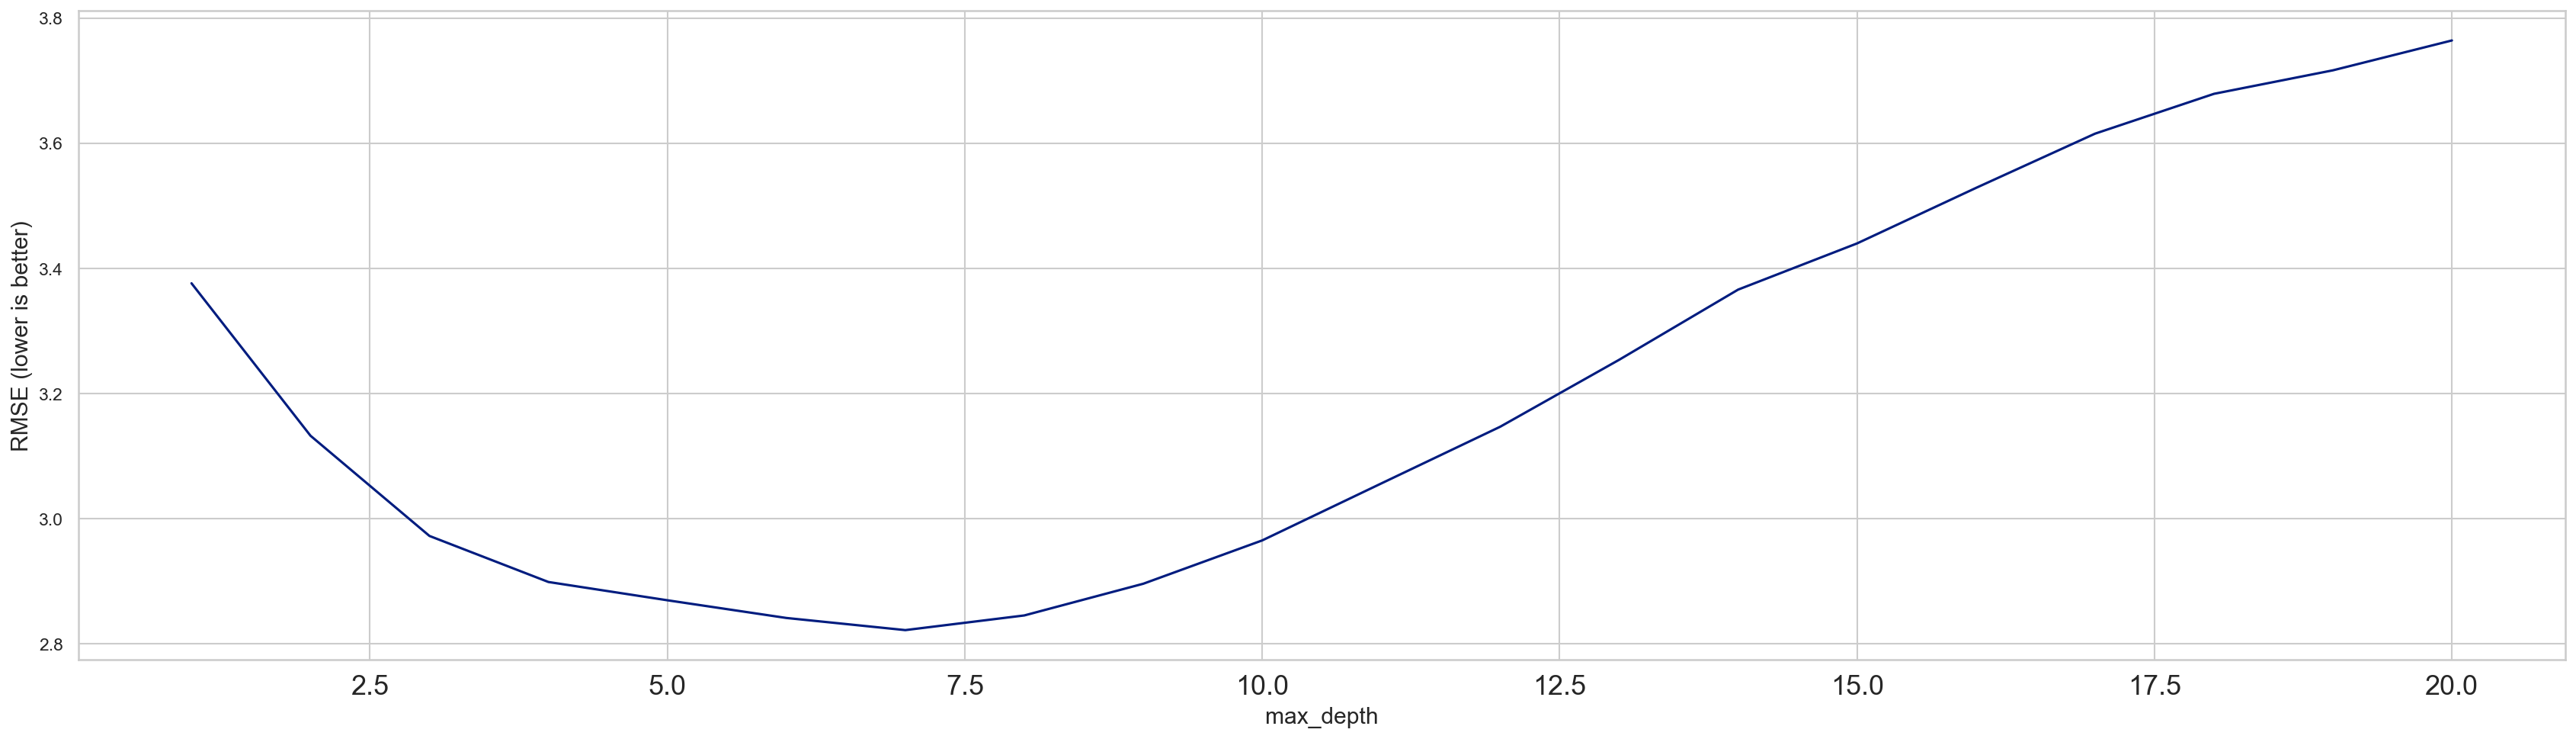

In [48]:
# Plot max_depth (x-axis) versus RMSE (y-axis).
plt.plot(max_depth_range, RMSE_scores);
plt.xlabel('max_depth');
plt.ylabel('RMSE (lower is better)');

In [49]:
# Show the best RMSE and the corresponding max_depth.
sorted(zip(RMSE_scores, max_depth_range))[0]

(2.8216769699783923, 7)

In [50]:
# max_depth=7 is optimal and so fit a tree using that parameter.
treereg = DecisionTreeRegressor(max_depth=7, random_state=1)
treereg.fit(X, y)

DecisionTreeRegressor(max_depth=7, random_state=1)

In [51]:
pd.DataFrame({'feature':feature_cols, 'importance':treereg.feature_importances_}).sort_values(by='importance', ascending=False)

feature    importance
6                  med_hhinc2016  7.006728e-01
4             frac_coll_plus2010  1.311336e-01
5              foreign_share2010  1.094711e-01
13                popdensity2010  2.254595e-02
8         singleparent_share2010  1.021012e-02
12         jobs_highpay_5mi_2015  6.540235e-03
7                 poor_share2010  3.782815e-03
15              job_density_2013  3.564956e-03
3                          state  3.440025e-03
11           jobs_total_5mi_2015  2.846863e-03
1                         czname  1.865050e-03
9              traveltime15_2010  1.381946e-03
2                         county  1.264650e-03
0                          tract  1.093109e-03
10        ln_wage_growth_hs_grad  1.859787e-04
14  ann_avg_job_growth_2004_2013  7.653314e-07

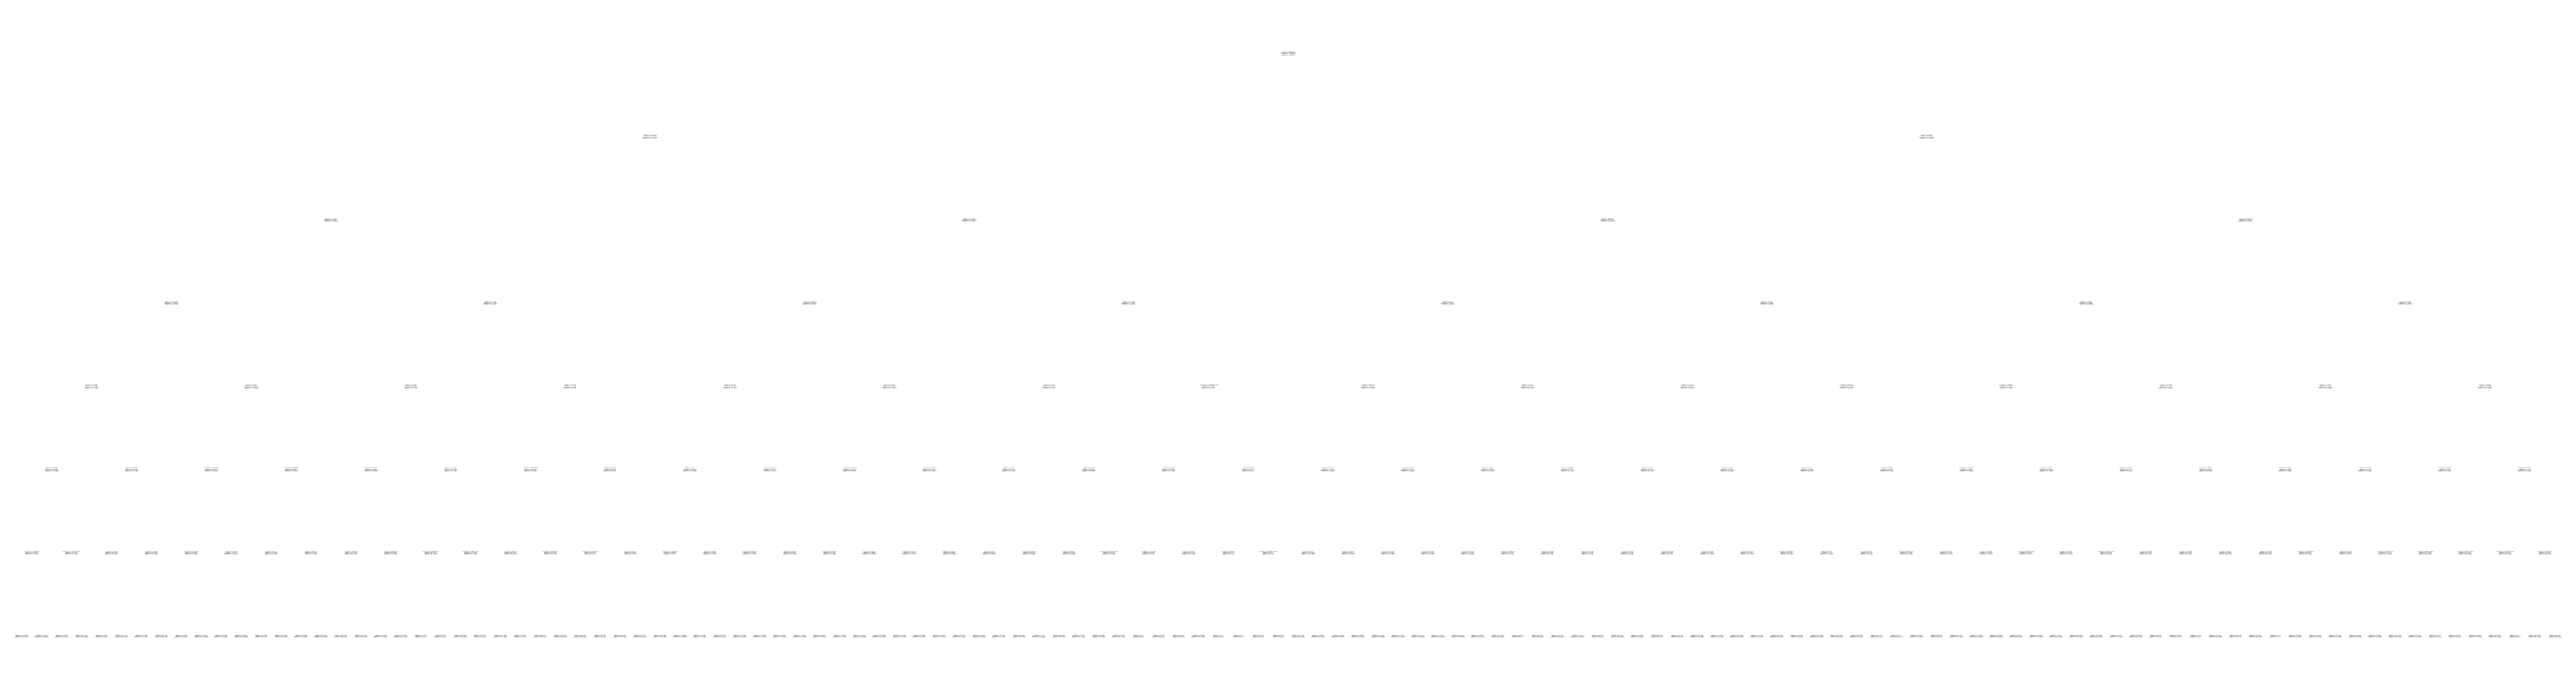

<Figure size 3750x3000 with 0 Axes>

In [53]:
#Tree diagram
import pydotplus as pydotplus
from sklearn import tree #Finally something works
treereg = DecisionTreeRegressor(max_depth=7, random_state=1)
treereg.fit(X, y)
tree.plot_tree(treereg);
fig = plt.figure(figsize=(25,20))
# Create a Graphviz file.
from sklearn.tree import export_graphviz
export_graphviz(treereg, out_file='./decisiontree.dot', feature_names=feature_cols)
#Please see decisiontree.png and decisiontree.dot

###  Random Forest Modeling using Harvard Opportunity Project data.
**Extending on Decision Tree**

In [56]:
#Decision trees and ensemble methods do not generally require feature scaling to be performed as they are not
#sensitive to the the variance in the data.
#Load Harvard Opportunity Project data
df = pd.read_csv ('Merged_Census_data.csv')
df.head()
#Clean data. Remove null values
df.dropna(inplace=True)
df.head()
#Cut out extraneous data columns
abridged_df=df[['state', 'county', 'tract', 'czname', 
       'mean_commutetime2000', 'frac_coll_plus2010',
       'foreign_share2010', 'med_hhinc2016', 'poor_share2010', 'share_white2010',
       'share_black2010', 'share_hisp2010', 'share_asian2010','gsmn_math_g3_2013', 'rent_twobed2015',
       'singleparent_share2010', 'traveltime15_2010', 'mail_return_rate2010', 'ln_wage_growth_hs_grad', 'jobs_total_5mi_2015',
       'jobs_highpay_5mi_2015', 'popdensity2010',
       'ann_avg_job_growth_2004_2013', 'job_density_2013', 'Life_Expectancy']].copy()
abridged_df.head()

state              county    tract      czname  mean_commutetime2000  \
1  Alabama  Autauga County, AL  20200.0  Montgomery             24.806705   
3  Alabama  Autauga County, AL  20400.0  Montgomery             22.965347   
4  Alabama  Autauga County, AL  20500.0  Montgomery             26.222353   
5  Alabama  Autauga County, AL  20600.0  Montgomery             21.630421   
9  Alabama  Autauga County, AL  20900.0  Montgomery             36.436531   

   frac_coll_plus2010  foreign_share2010  med_hhinc2016  poor_share2010  \
1            0.267194           0.016337        41107.0        0.147590   
3            0.252744           0.015083        52704.0        0.063223   
4            0.375063           0.046488        52463.0        0.059569   
5            0.239424           0.024985        63750.0        0.105232   
9            0.127820           0.009670        44591.0        0.099070   

   share_white2010  ...  singleparent_share2010  traveltime15_2010  \
1         0.388940  ...                0.488462           0.152040   
3         0.918833  ...                0.227533           0.350673   
4         0.783764  ...                0.259698           0.250496   
5         0.728462  ...                0.316372           0.341646   
9         0.843348  ...                0.264840           0.061808   

   mail_return_rate2010  ln_wage_growth_hs_grad  jobs_total_5mi_2015  \
1             81.300003                0.089306               9948.0   
3             83.500000               -0.072311              12933.0   
4             77.300003               -0.096140              12933.0   
5             82.800003               -0.048562               9193.0   
9             83.000000                0.035837                279.0   

   jobs_highpay_5mi_2015  popdensity2010  ann_avg_job_growth_2004_2013  \
1                 3328.0     1682.170500                     -0.004253   
3                 3635.0     1780.032500                     -0.019841   
4                 3635.0     2446.262200                      0.018627   
5                 3052.0     1184.372100                     -0.051588   
9                  106.0       50.206135                      0.001544   

   job_density_2013  Life_Expectancy  
1         971.31787             76.9  
3         207.38637             75.4  
4         800.27264             79.4  
5         336.77753             73.1  
9           2.56560             73.9  

[5 rows x 25 columns]

In [57]:
#Encode variables
from sklearn.preprocessing import LabelEncoder
label_state = LabelEncoder()
label_county = LabelEncoder()
label_tract = LabelEncoder()
label_czname = LabelEncoder()
abridged_df['state'] = label_state.fit_transform(abridged_df['state'])
abridged_df['county'] = label_county.fit_transform(abridged_df['county'])
abridged_df['tract'] = label_county.fit_transform(abridged_df['tract'])
abridged_df['czname'] = label_czname.fit_transform(abridged_df['czname'])

#Set up variables for testing
# Define X and y.
feature_cols = ['tract', 'czname', 'county', 'state','frac_coll_plus2010',
       'foreign_share2010', 'med_hhinc2016', 'poor_share2010',
       'singleparent_share2010','traveltime15_2010', 'ln_wage_growth_hs_grad', 'jobs_total_5mi_2015',
       'jobs_highpay_5mi_2015', 'popdensity2010',
       'ann_avg_job_growth_2004_2013', 'job_density_2013']
X = abridged_df[feature_cols]
y = abridged_df.Life_Expectancy

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [58]:
from sklearn.ensemble import RandomForestRegressor

In [59]:
#Note: If float is used, then max_features is a percentage and int(max_features * n_features)
# features are considered at each split. The n_features=16 : ('tract', 'czname', 'frac_coll_plus2010',
# 'foreign_share2010', 'med_hhinc2016', 'poor_share2010','gsmn_math_g3_2013', 'rent_twobed2015',
# 'singleparent_share2010','traveltime15_2010', 'ln_wage_growth_hs_grad', 'jobs_total_5mi_2015',
#  jobs_highpay_5mi_2015', 'popdensity2010','ann_avg_job_growth_2004_2013', 'job_density_2013',
# 'Life_Expectancy'. I will use 15/16 features and so 0.94 max features.
rfreg = RandomForestRegressor(n_estimators=100, 
                              max_features=0.94,
                              oob_score=True,
                              random_state=1)
rfreg.fit(X, y)

RandomForestRegressor(max_features=0.94, oob_score=True, random_state=1)

In [60]:
# Compute feature importances.
import pandas as pd
pd.DataFrame({'feature':feature_cols,
              'importance':rfreg.feature_importances_}).sort_values(by='importance')

feature  importance
1                         czname    0.022843
12         jobs_highpay_5mi_2015    0.022991
11           jobs_total_5mi_2015    0.023023
3                          state    0.023490
2                         county    0.024067
0                          tract    0.027542
10        ln_wage_growth_hs_grad    0.028298
14  ann_avg_job_growth_2004_2013    0.028660
15              job_density_2013    0.029871
9              traveltime15_2010    0.029956
7                 poor_share2010    0.036214
8         singleparent_share2010    0.039791
13                popdensity2010    0.043347
5              foreign_share2010    0.096254
4             frac_coll_plus2010    0.110481
6                  med_hhinc2016    0.413172

In [61]:
# Compute the out-of-bag R-squared score.
print((rfreg.oob_score_))

# Find the average RMSE.
scores = cross_val_score(rfreg, X, y, cv=10, scoring='neg_mean_squared_error')
np.mean(np.sqrt(-scores))

0.5715432672359625


2.680614924327819

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 89)

In [63]:
# Fit the model on only the train data
#Note: If float is used, then max_features is a percentage and int(max_features * n_features)
# features are considered at each split. The n_features=16 : ('tract', 'czname', 'frac_coll_plus2010',
# 'foreign_share2010', 'med_hhinc2016', 'poor_share2010','gsmn_math_g3_2013', 'rent_twobed2015',
# 'singleparent_share2010','traveltime15_2010', 'ln_wage_growth_hs_grad', 'jobs_total_5mi_2015',
#  jobs_highpay_5mi_2015', 'popdensity2010','ann_avg_job_growth_2004_2013', 'job_density_2013',
# 'Life_Expectancy'). I will use 15/16 features and so 0.94 max features.
rfreg = RandomForestRegressor(n_estimators=150, max_features=0.94, oob_score=True, random_state=1)
rfreg.fit(X_train, y_train)

RandomForestRegressor(max_features=0.94, n_estimators=150, oob_score=True,
                      random_state=1)

In [64]:
# Set a threshold for which features to include.
from sklearn.feature_selection import SelectFromModel

print(SelectFromModel(rfreg, threshold='mean', prefit=True).transform(X_train).shape)
print(SelectFromModel(rfreg, threshold='median', prefit=True).transform(X_train).shape)

(27228, 3)
(27228, 8)


In [65]:
# Create a new feature matrix that only includes important features.

X_important =  SelectFromModel(rfreg, threshold='mean', prefit=True).transform(X_test)

In [66]:
X_important

array([[1.3997166e-01, 1.1579180e-01, 3.6250000e+04],
       [1.3231850e-01, 3.2920849e-02, 4.3007000e+04],
       [1.5350534e-01, 3.3570546e-01, 4.3031000e+04],
       ...,
       [2.4563138e-01, 2.0510374e-02, 6.2123000e+04],
       [5.2268398e-01, 2.3254968e-01, 1.3369800e+05],
       [1.3132022e-01, 1.5822785e-02, 4.0665000e+04]])

In [67]:
# Check the RMSE for a random forest that only includes important features.
rfreg = RandomForestRegressor(n_estimators=150, max_features=0.94, random_state=1)

scores = cross_val_score(rfreg, X_important, y_test, cv=10, scoring='neg_mean_squared_error')
np.mean(np.sqrt(-scores))

2.8628159836114495

In [68]:
y_pred = regressor.predict(X_test)
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.8792662774044289
Mean Squared Error: 4.276068084168778
Root Mean Squared Error: 2.067865586581676


In [69]:
# Calculate the absolute errors
errors = abs(y_pred - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 0.88 degrees.
Accuracy: 98.87 %.


In [70]:
rfreg = RandomForestRegressor(n_estimators=150, max_features=0.94, oob_score=True, random_state=1)
rfreg.fit(X_train, y_train)


RandomForestRegressor(max_features=0.94, n_estimators=150, oob_score=True,
                      random_state=1)

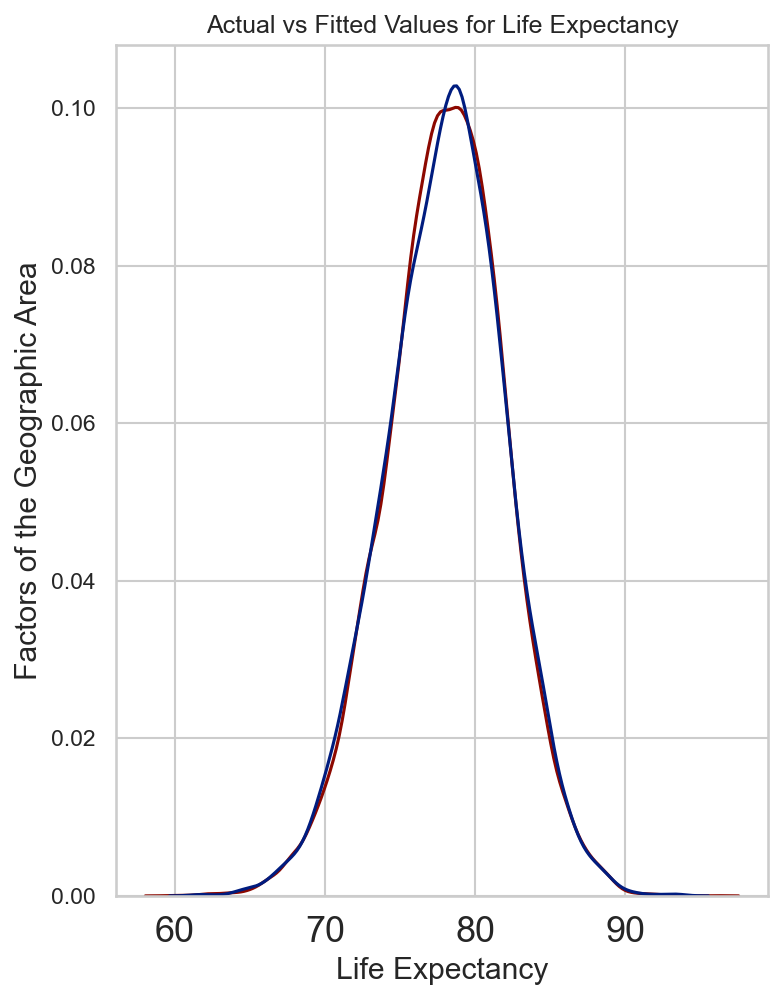

In [71]:
import seaborn as sns
plt.figure(figsize=(5, 7))


ax = sns.distplot(y, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax)
plt.xlabel('Life Expectancy')
plt.ylabel('Factors of the Geographic Area')
plt.title('Actual vs Fitted Values for Life Expectancy')


plt.show()
plt.close()

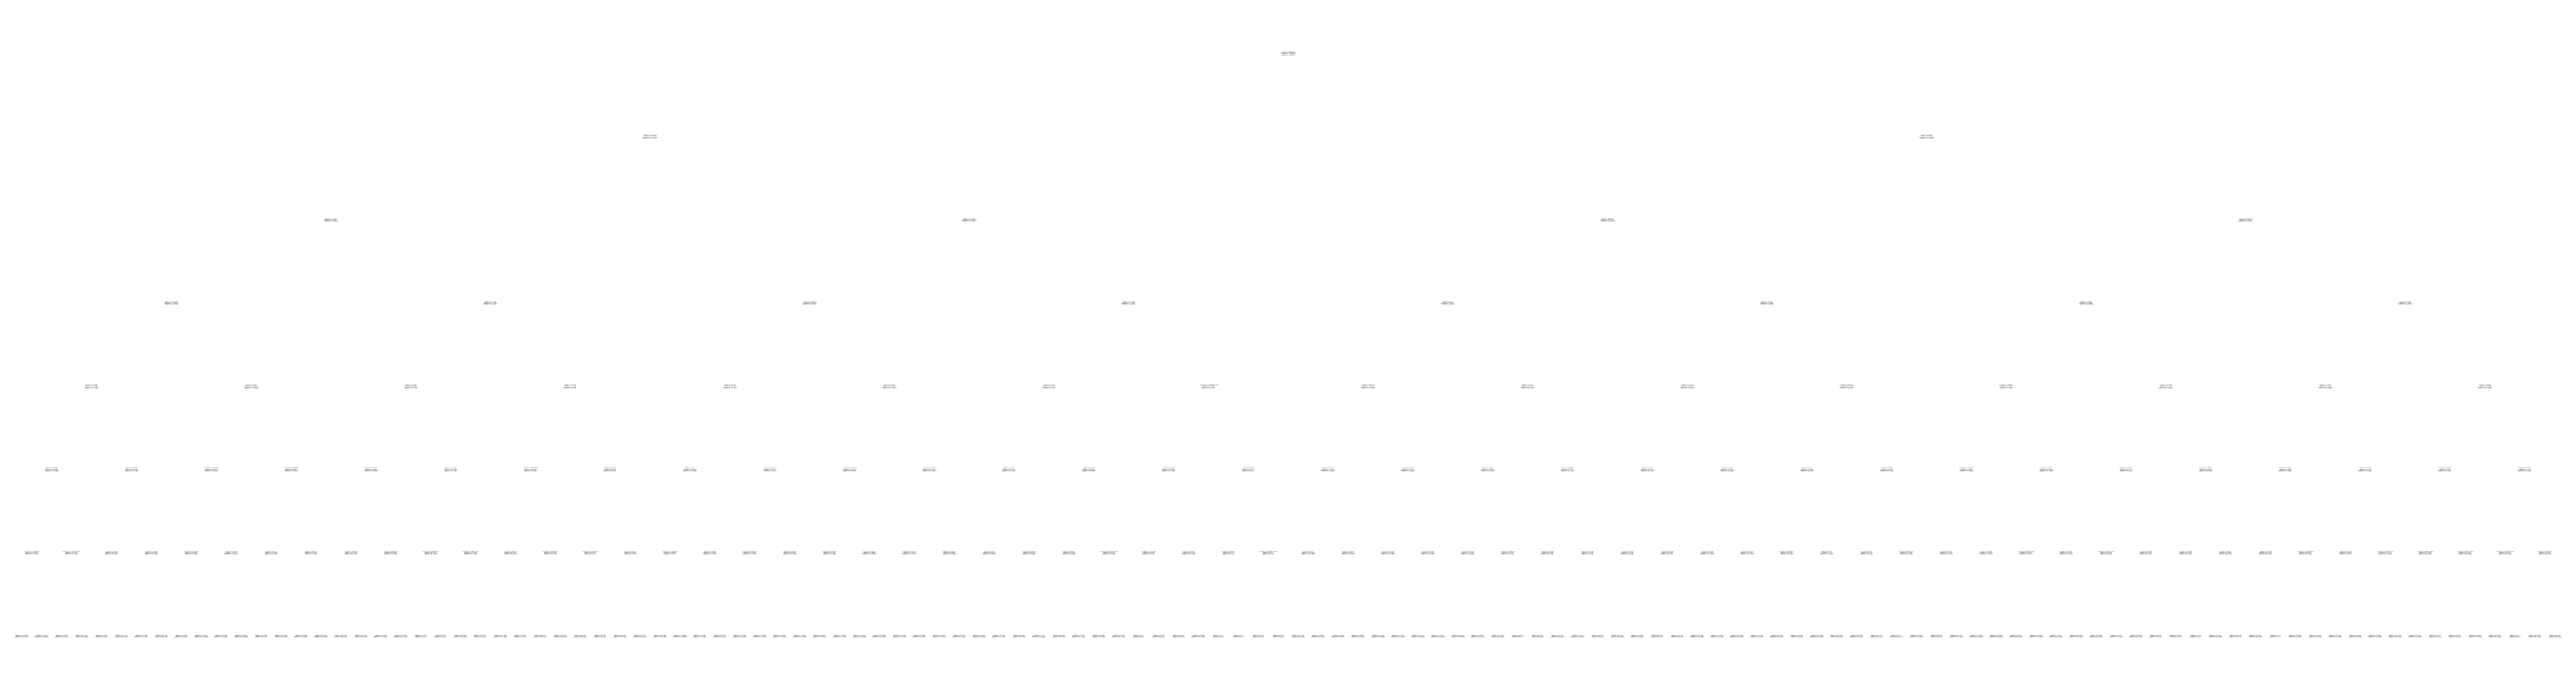

<Figure size 3750x3000 with 0 Axes>

In [72]:
import pydotplus
from sklearn import tree
rfreg = RandomForestRegressor(n_estimators=150, max_features=0.94, oob_score=True, random_state=1)
rfreg.fit(X_train, y_train)
tree.plot_tree(treereg);
fig = plt.figure(figsize=(25,20))

# Create a Graphviz file.
from sklearn.tree import export_graphviz
export_graphviz(treereg, out_file='./randomforesttree.dot', feature_names=feature_cols)
#please see randomforesttree.png

In [73]:
df['Life_Expectancy'] = rfreg.predict(X[feature_cols])


In [74]:
random_forest_merged_census_df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
random_forest_merged_census_df

Actual  Predicted
27911    72.4       72.4
23777    71.7       71.7
9806     74.9       74.9
56371    82.4       82.4
57909    80.7       80.7
...       ...        ...
52029    77.4       77.4
7484     82.0       79.0
58445    78.2       78.2
42082    81.7       81.7
52686    73.7       71.2

[9077 rows x 2 columns]